In [1]:
import os
import numpy as np
import torch
from torch import Tensor
from torch.nn.parameter import Parameter
from torch.autograd import Variable
import torch.nn.functional as F
from lib.dataset_custom import KernDataset,DatasetSplit
from lib.model import ScoreModel
from lib.opt import optimize
from lib.CrossValidation import CrossValidator
from lib.config import corpora_for_classification_all_composers as default_corpora
import lib.media as media

In [2]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='2'
#os.environ['CUDA_LAUNCH_BLOCKING']='1'

checkpoint_dir = '_just_voices_cv'
context = 500
corpora = tuple(default_corpora)

In [3]:
class Convnet(ScoreModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def define_graph(self, debug=False):        
        self.km = km = 300
        
        self.wnotesm = Parameter(Tensor(km, self.m, 1, 3))
        self.wdurationm = Parameter(Tensor(km, self.maxdur, 1, 3))
        self.w2m = Parameter(Tensor(km, km, 1, 3))
        self.wtopm = Parameter(Tensor(km, self.composers))
        
        self.bias = Parameter(Tensor(self.composers))
    
    def forward(self, x):
        e,t,_,_ = x
        batch_size = e.shape[0]
        
        z1m = F.relu(F.conv2d(e.view(batch_size*3,context,6,self.m).transpose(1,3),self.wnotesm) \
            + F.conv2d(t.view(batch_size*3,context,6,self.maxdur).transpose(1,3),self.wdurationm))
        z2m = F.relu(F.conv2d(z1m,self.w2m))
        z2m = z2m.view(batch_size,3,self.km,-1).mean(1).mean(2)
        
        return torch.mm(z2m, self.wtopm) + self.bias[None,:].expand(e.shape[0],-1)

---------------------------------------------
---------------------------------------------
Fold 0
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256, 20]) (5120)
bias torch.Size([20]) (20)
Initialized graph with 303892 parameters
Initiating optimizer, 62 iterations/epoch.
acc_tr	acc_ts	iter	loss_tr	loss_ts	time	utime
1.50    1.72    0       4.26    4.29    5.88    5.13    
39.00   36.91   62      3.21    3.35    14.11   3.44    
49.50   48.50   124     2.43    2.63    13.35   3.69    
60.00   54.08   186     1.86    2.11    13.27   3.73    
65.00   60.09   248     1.67    1.78    13.56   3.79    
67.50   62.66   310     1.51    1.60    13.05   3.66    
71.00   66.09   372     1.27    1.5

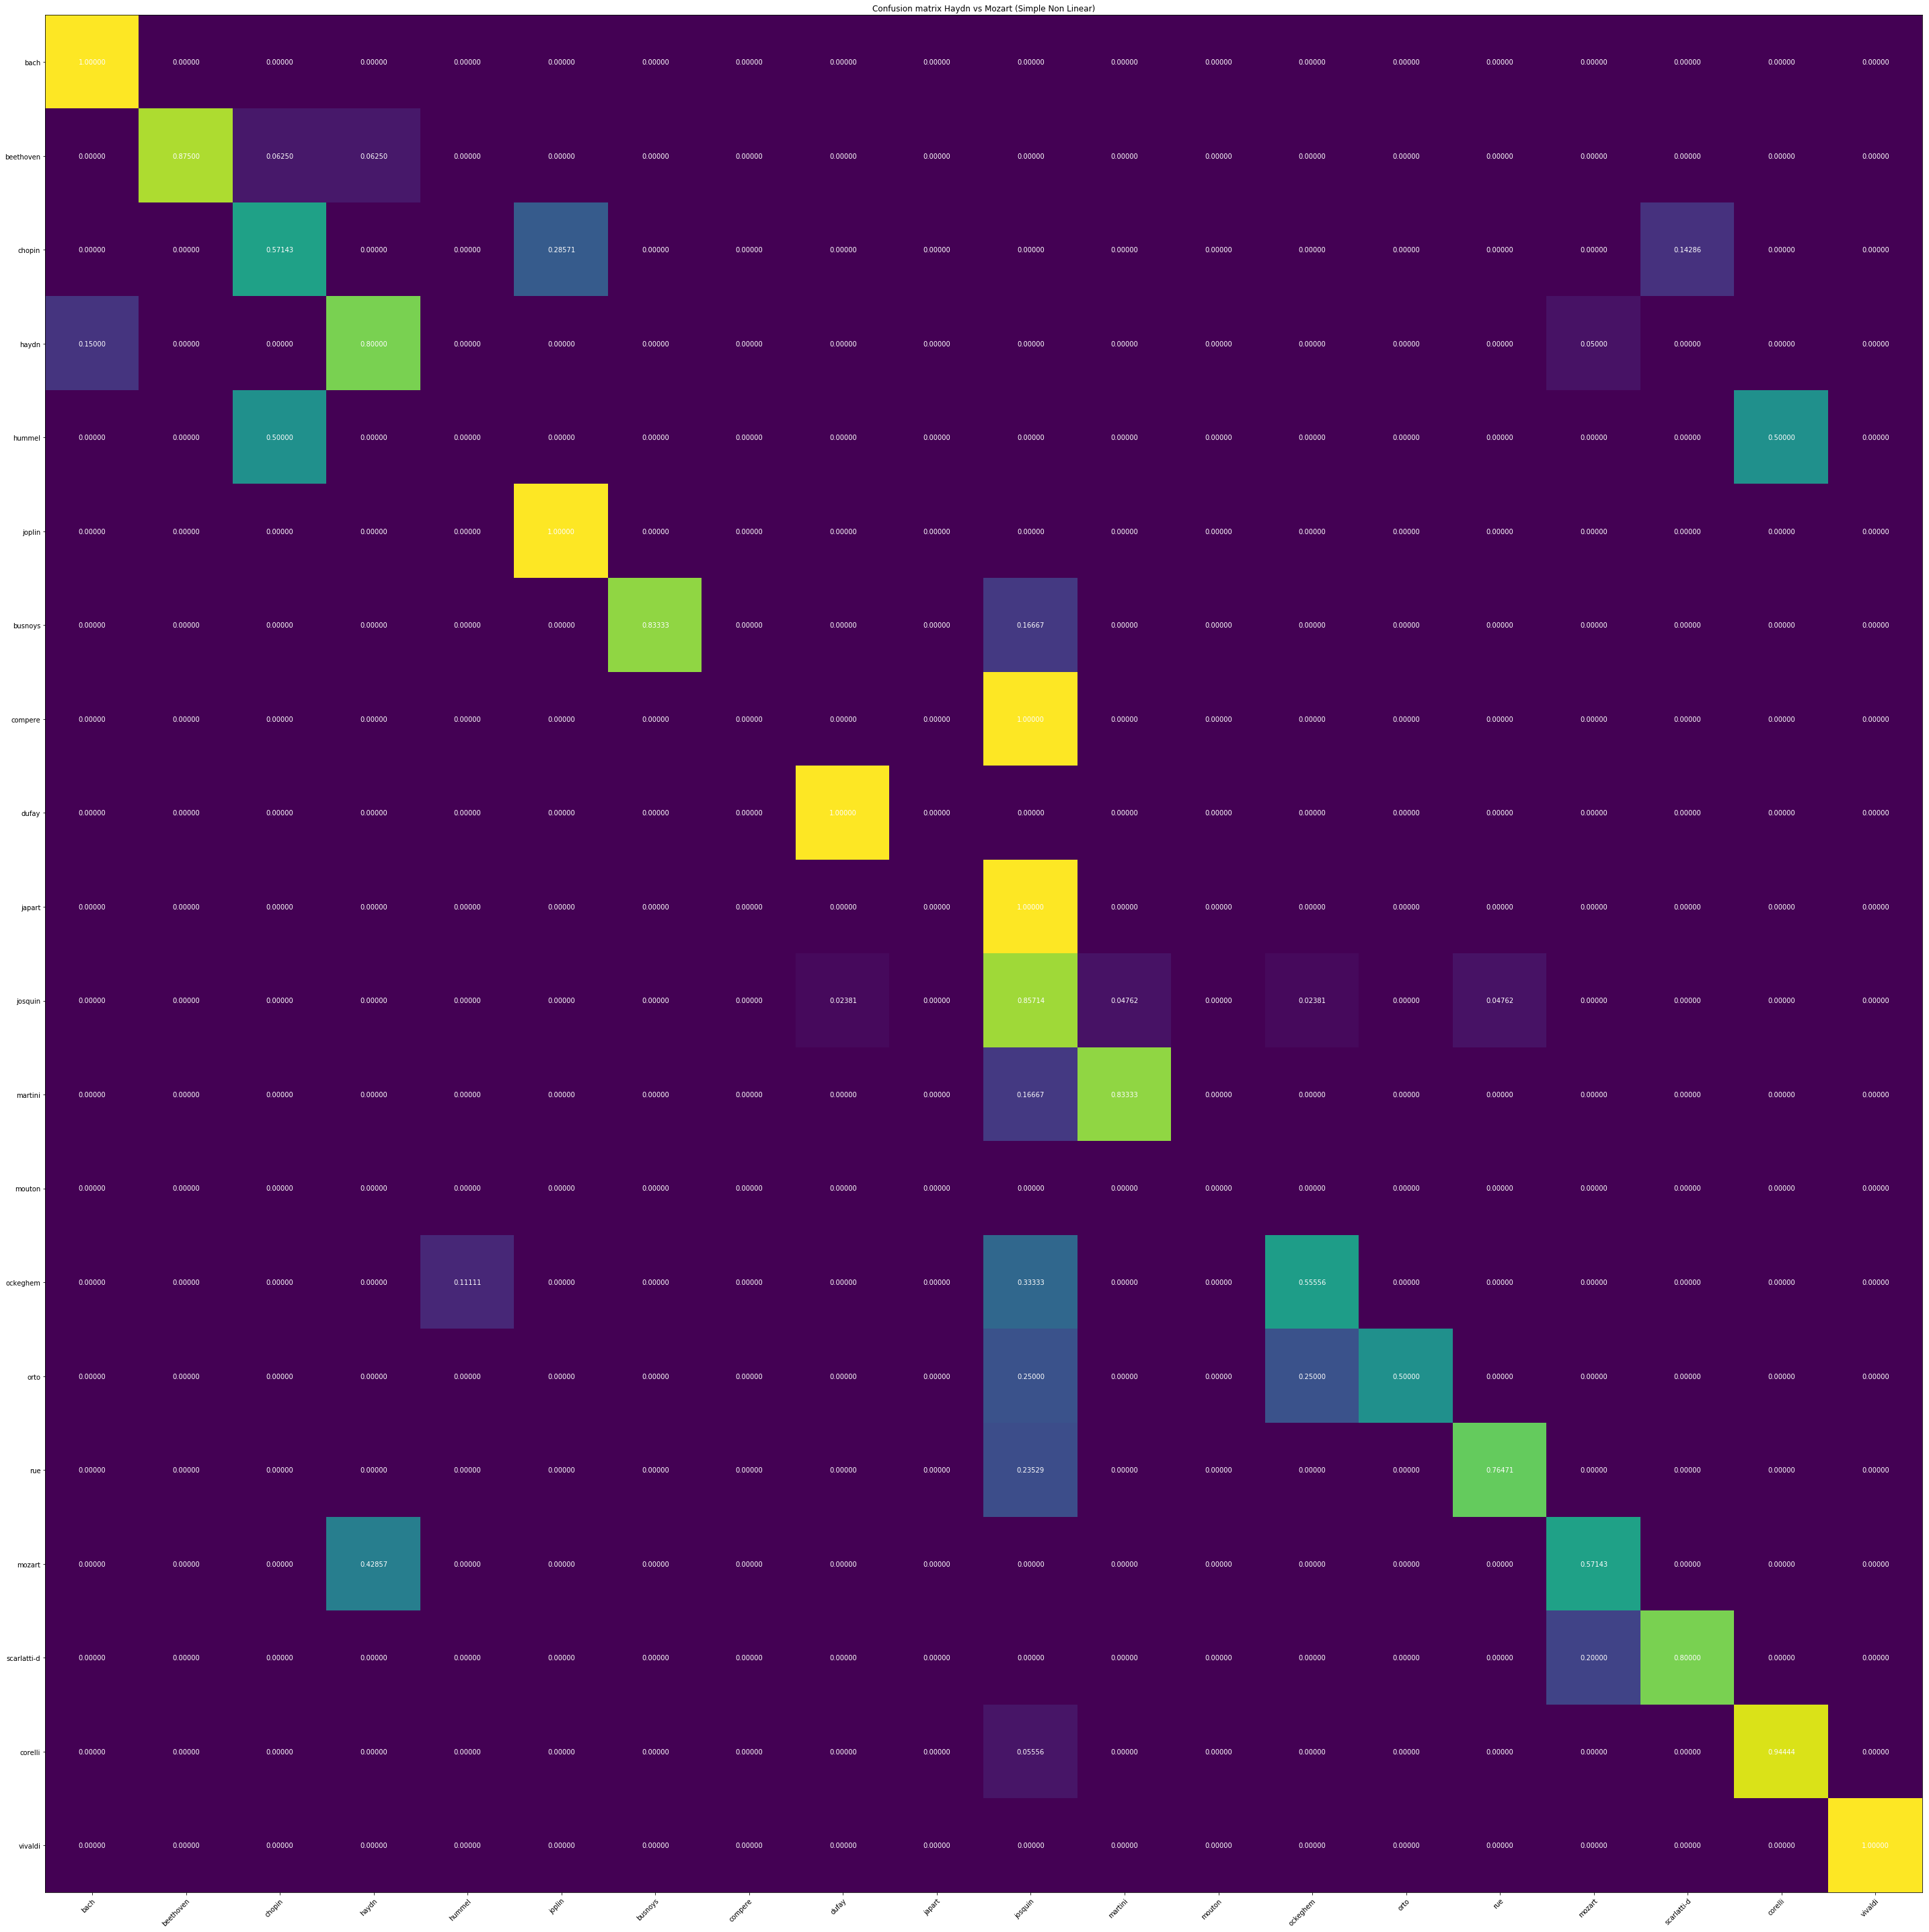

bach 46 / 46 = 1.0
beethoven 14 / 16 = 0.875
busnoys 5 / 6 = 0.8333333333333334
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 16 / 20 = 0.8
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 36 / 42 = 0.8571428571428571
martini 10 / 12 = 0.8333333333333334
mozart 8 / 14 = 0.5714285714285714
ockeghem 5 / 9 = 0.5555555555555556
orto 2 / 4 = 0.5
rue 13 / 17 = 0.7647058823529411
scarlatti-d 4 / 5 = 0.8
vivaldi 3 / 3 = 1.0
190 232 0.8189655172413793
---------------------------------------------
---------------------------------------------
Fold 1
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256, 20]) (5120)
bi

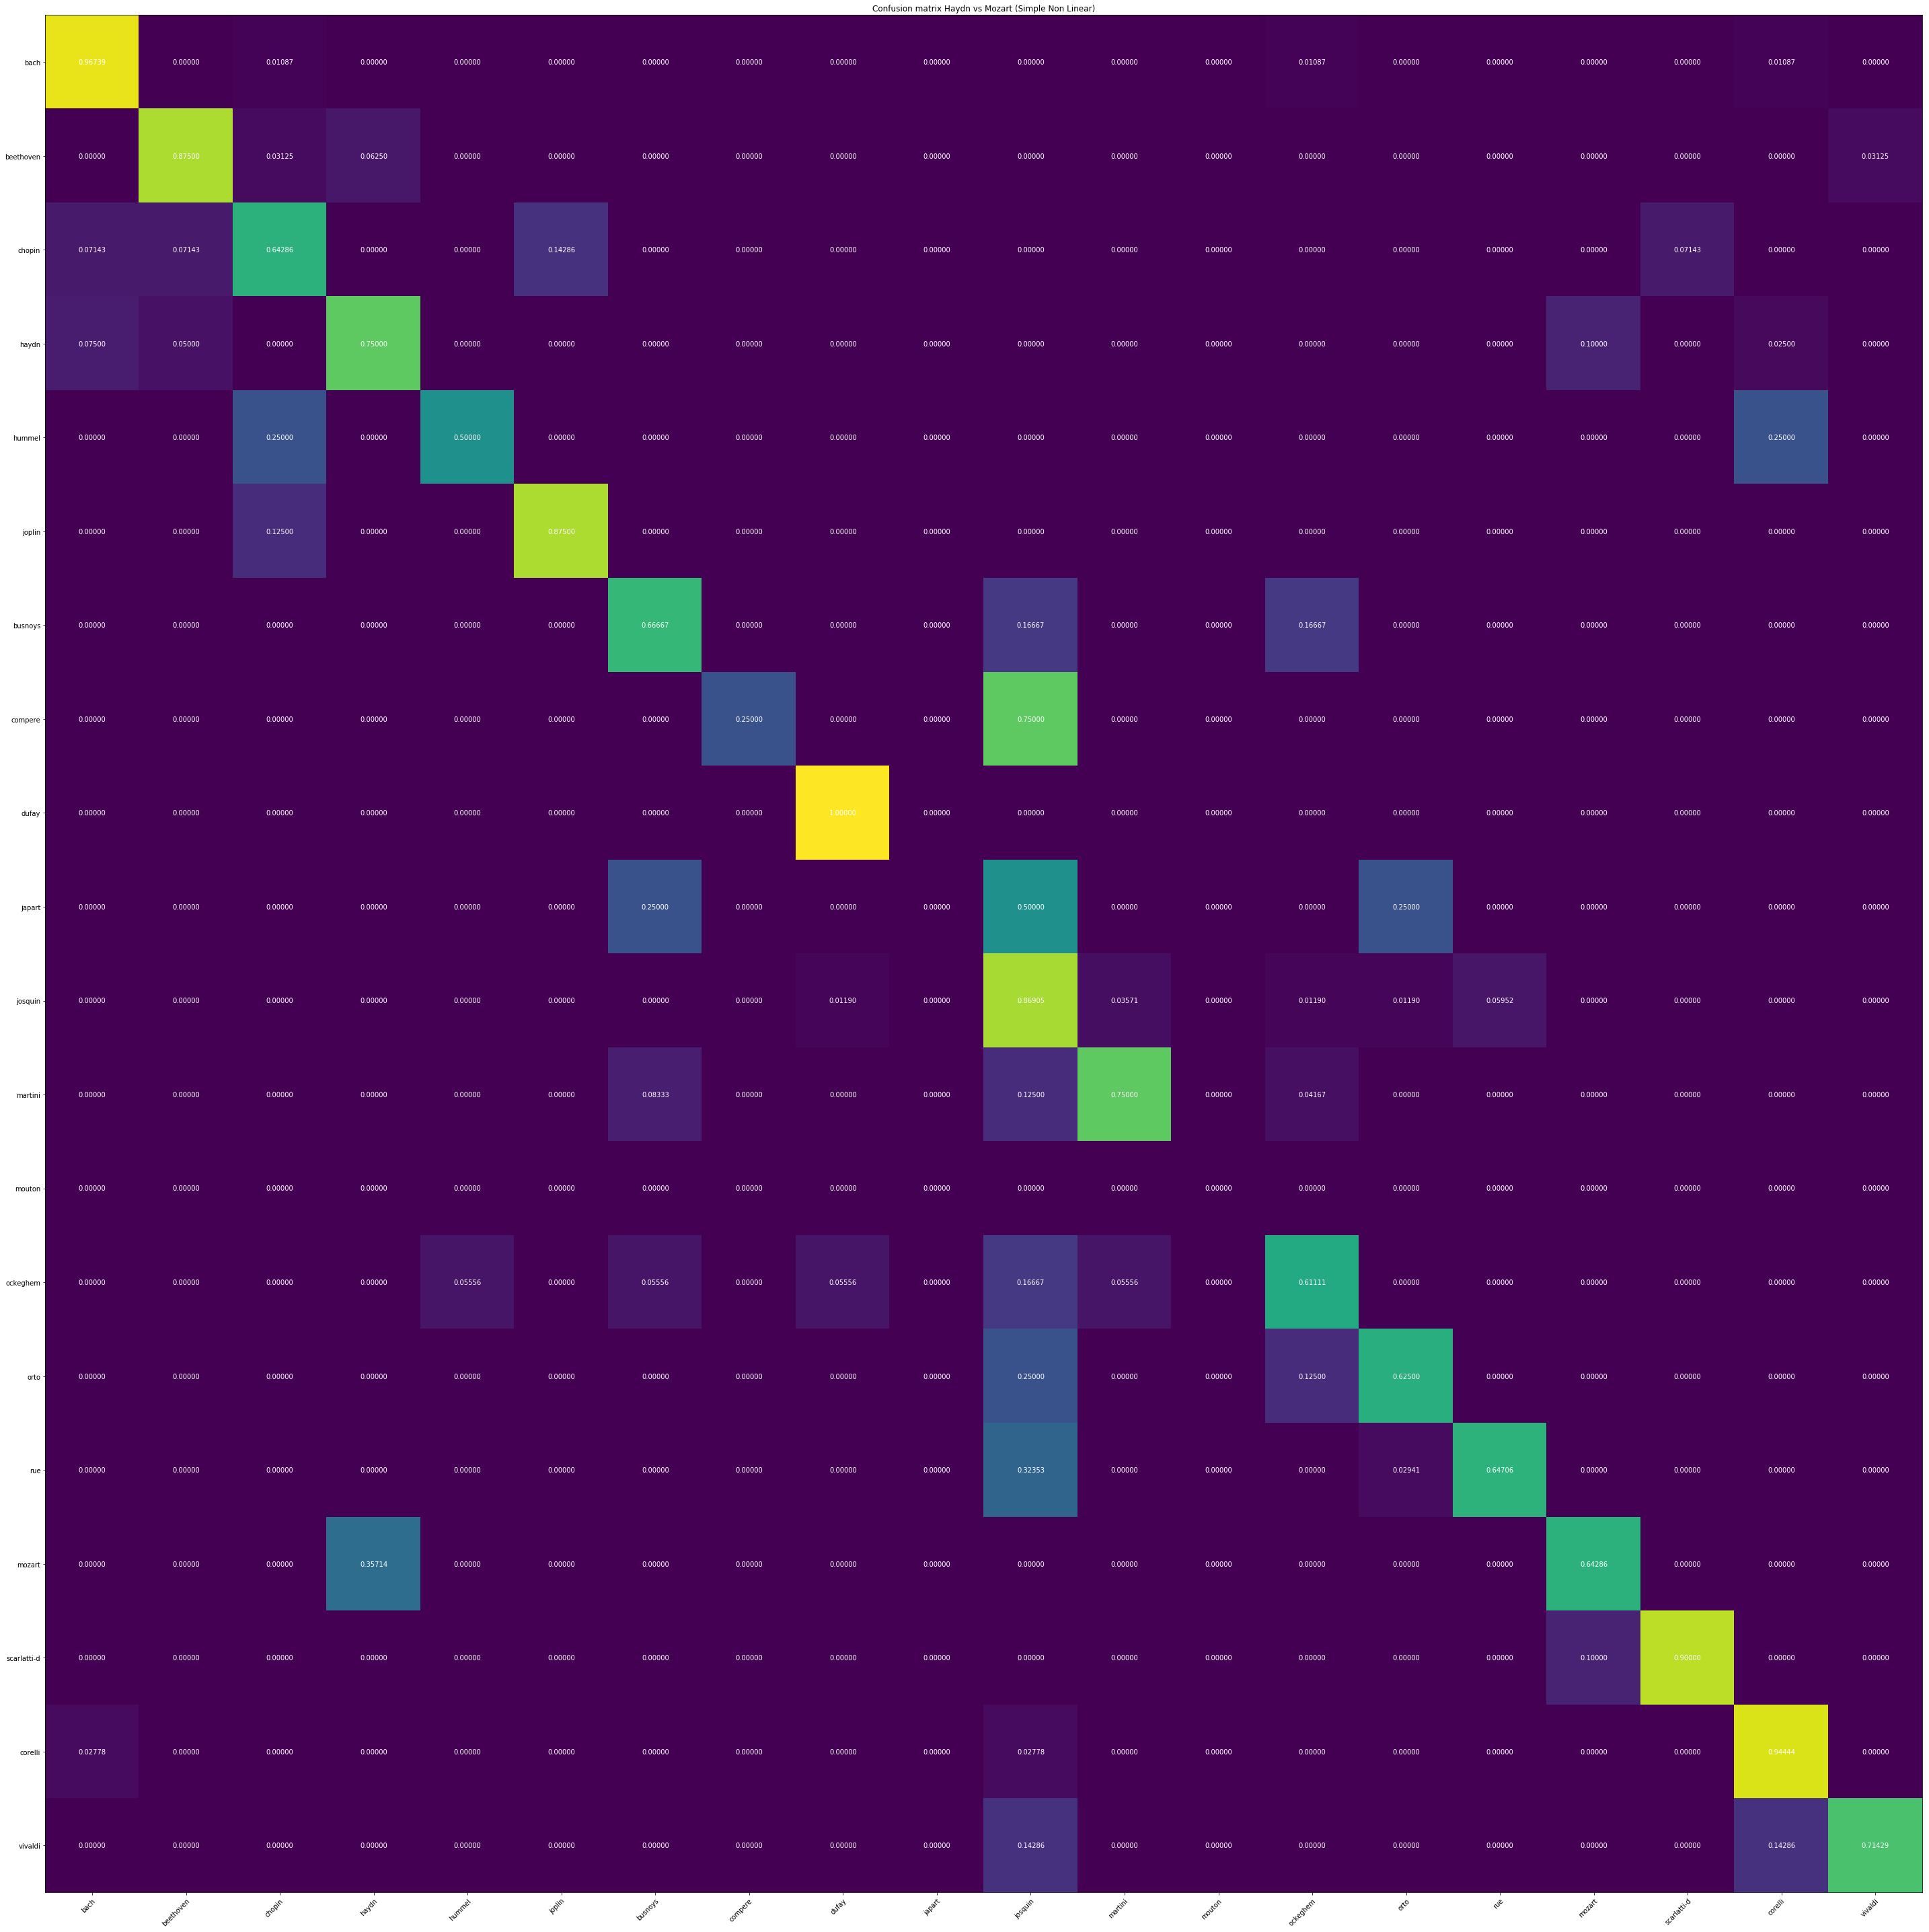

bach 43 / 46 = 0.9347826086956522
beethoven 14 / 16 = 0.875
busnoys 3 / 6 = 0.5
chopin 5 / 7 = 0.7142857142857143
compere 1 / 2 = 0.5
corelli 17 / 18 = 0.9444444444444444
dufay 3 / 3 = 1.0
haydn 14 / 20 = 0.7
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 37 / 42 = 0.8809523809523809
martini 8 / 12 = 0.6666666666666666
mozart 10 / 14 = 0.7142857142857143
ockeghem 6 / 9 = 0.6666666666666666
orto 3 / 4 = 0.75
rue 9 / 17 = 0.5294117647058824
scarlatti-d 5 / 5 = 1.0
vivaldi 2 / 4 = 0.5
185 233 0.7939914163090128
---------------------------------------------
---------------------------------------------
Fold 2
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256, 20]) (5120)
b

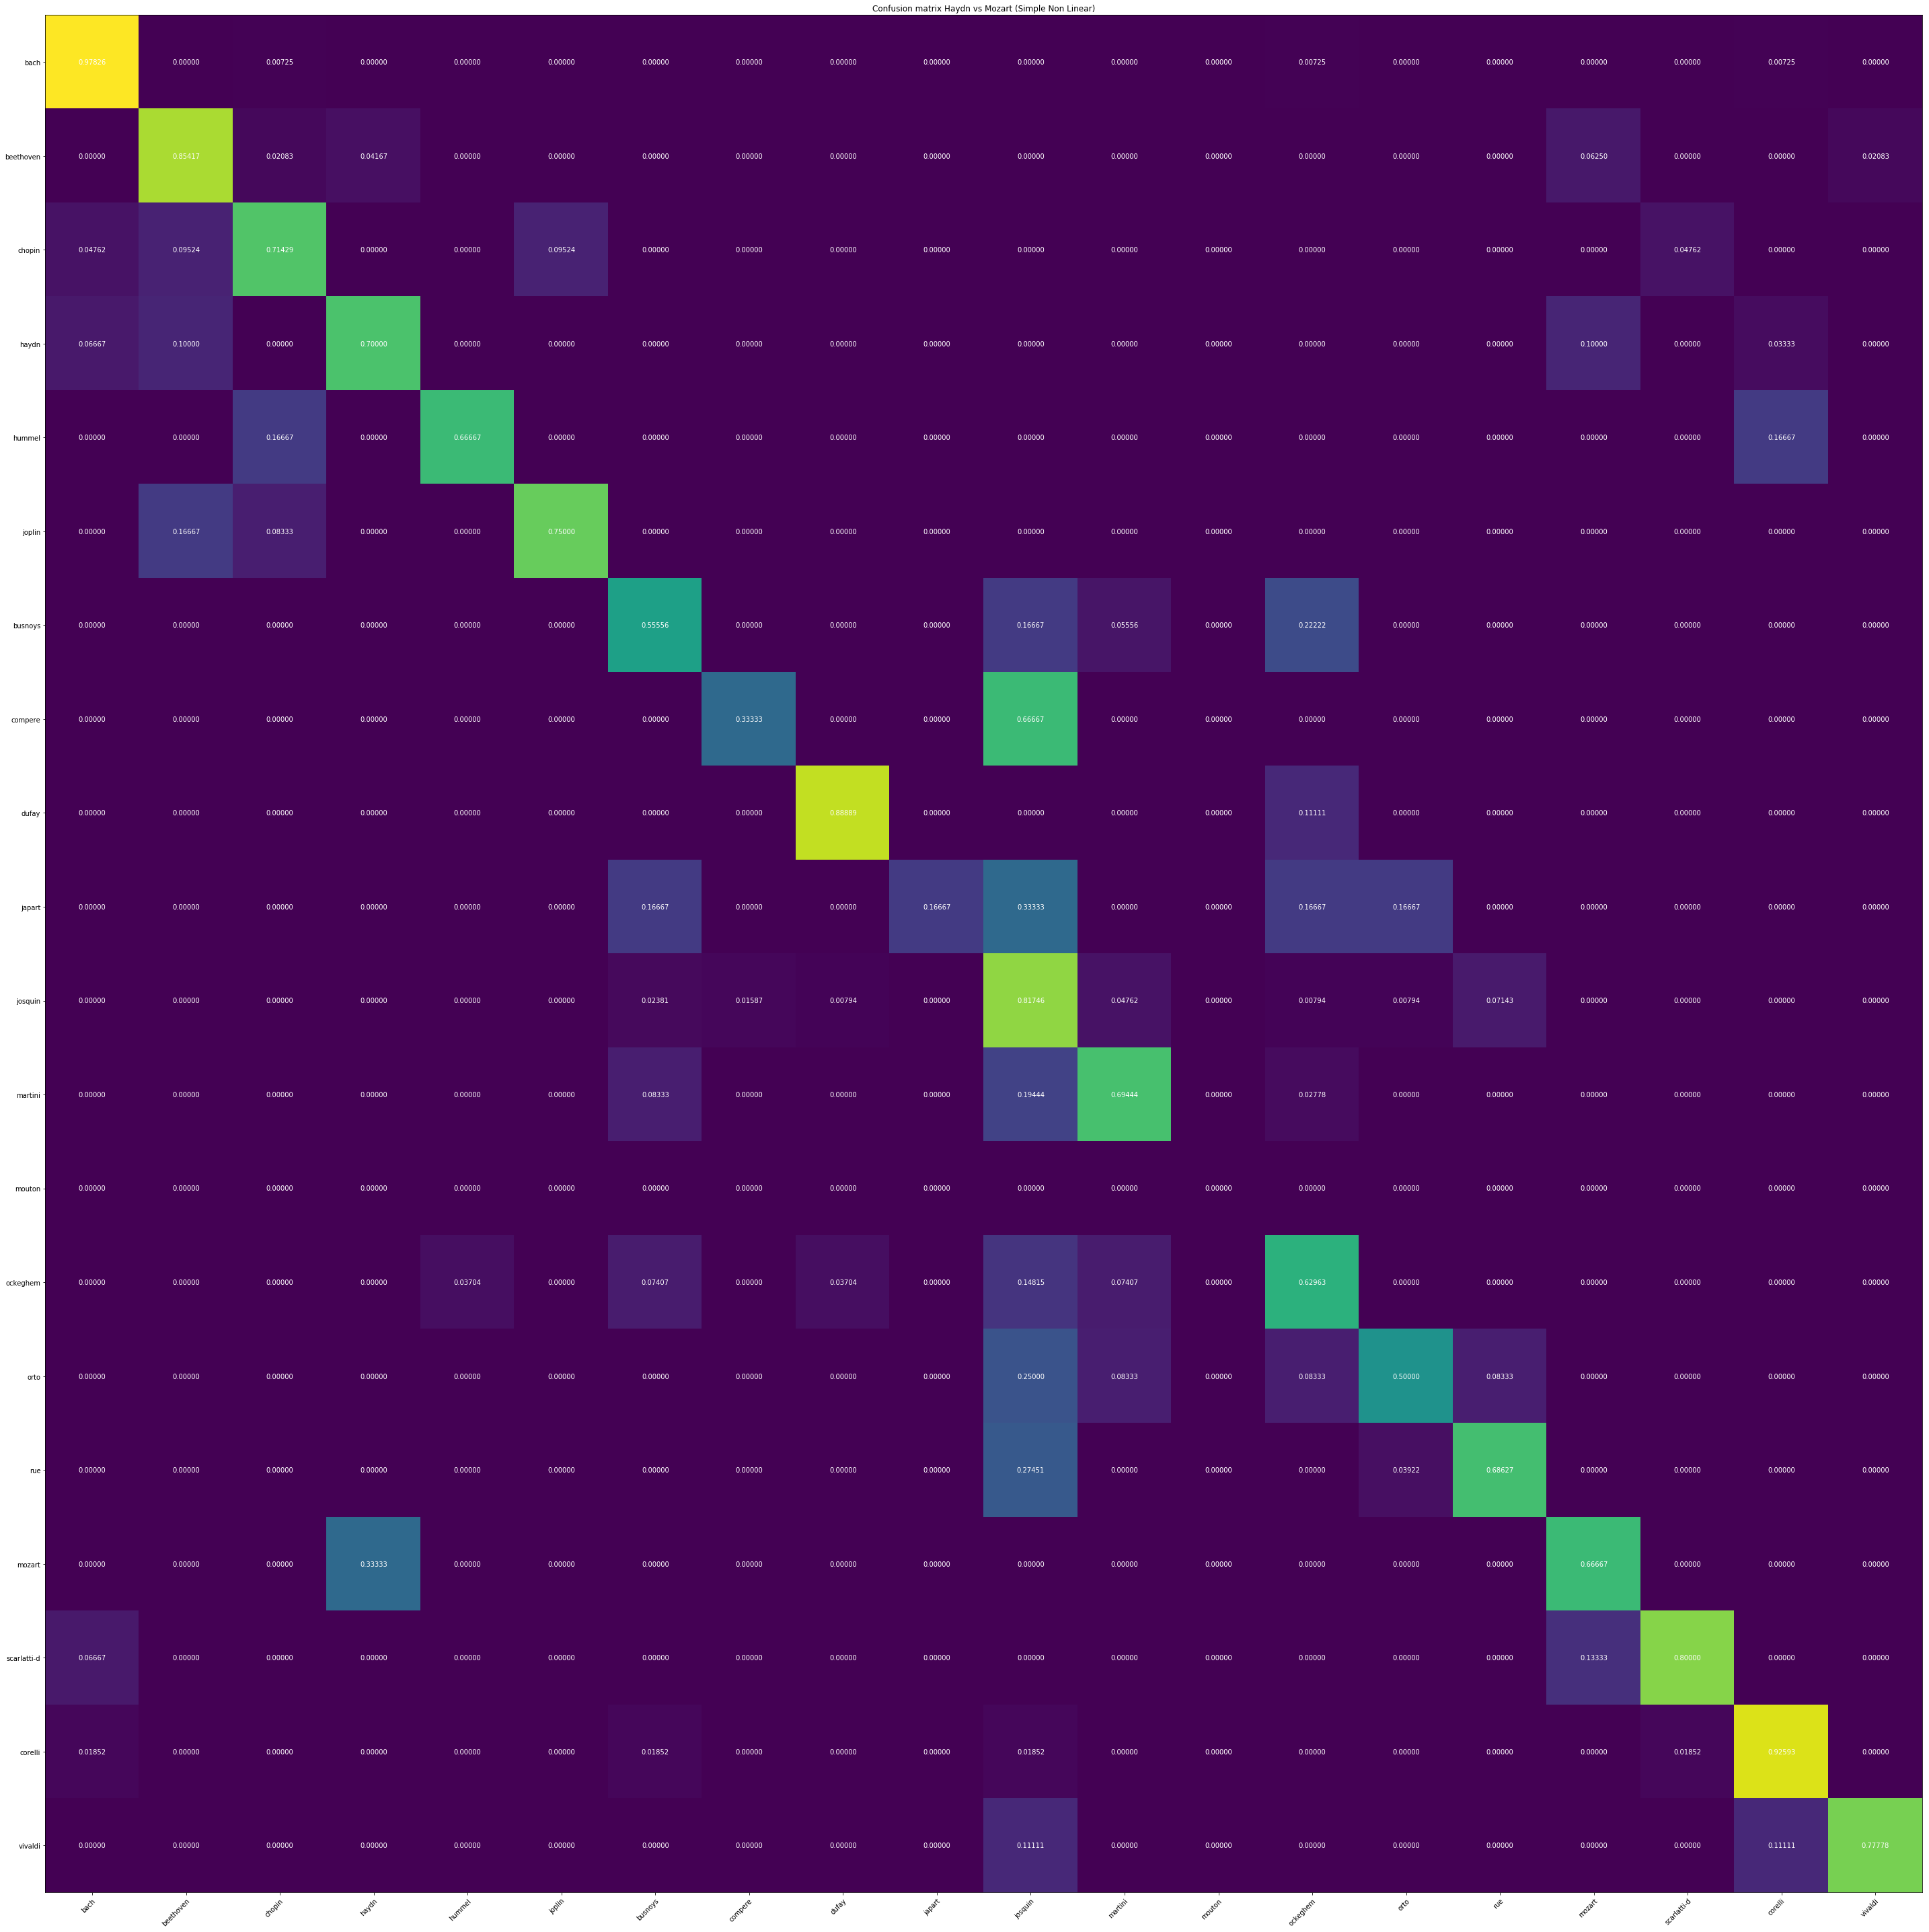

bach 46 / 46 = 1.0
beethoven 13 / 16 = 0.8125
busnoys 2 / 6 = 0.3333333333333333
chopin 6 / 7 = 0.8571428571428571
compere 1 / 2 = 0.5
corelli 16 / 18 = 0.8888888888888888
dufay 2 / 3 = 0.6666666666666666
haydn 12 / 20 = 0.6
hummel 2 / 2 = 1.0
japart 1 / 2 = 0.5
joplin 2 / 4 = 0.5
josquin 30 / 42 = 0.7142857142857143
martini 7 / 12 = 0.5833333333333334
mozart 10 / 14 = 0.7142857142857143
ockeghem 6 / 9 = 0.6666666666666666
orto 1 / 4 = 0.25
rue 13 / 17 = 0.7647058823529411
scarlatti-d 3 / 5 = 0.6
vivaldi 2 / 2 = 1.0
175 231 0.7575757575757576
---------------------------------------------
---------------------------------------------
Fold 3
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([25

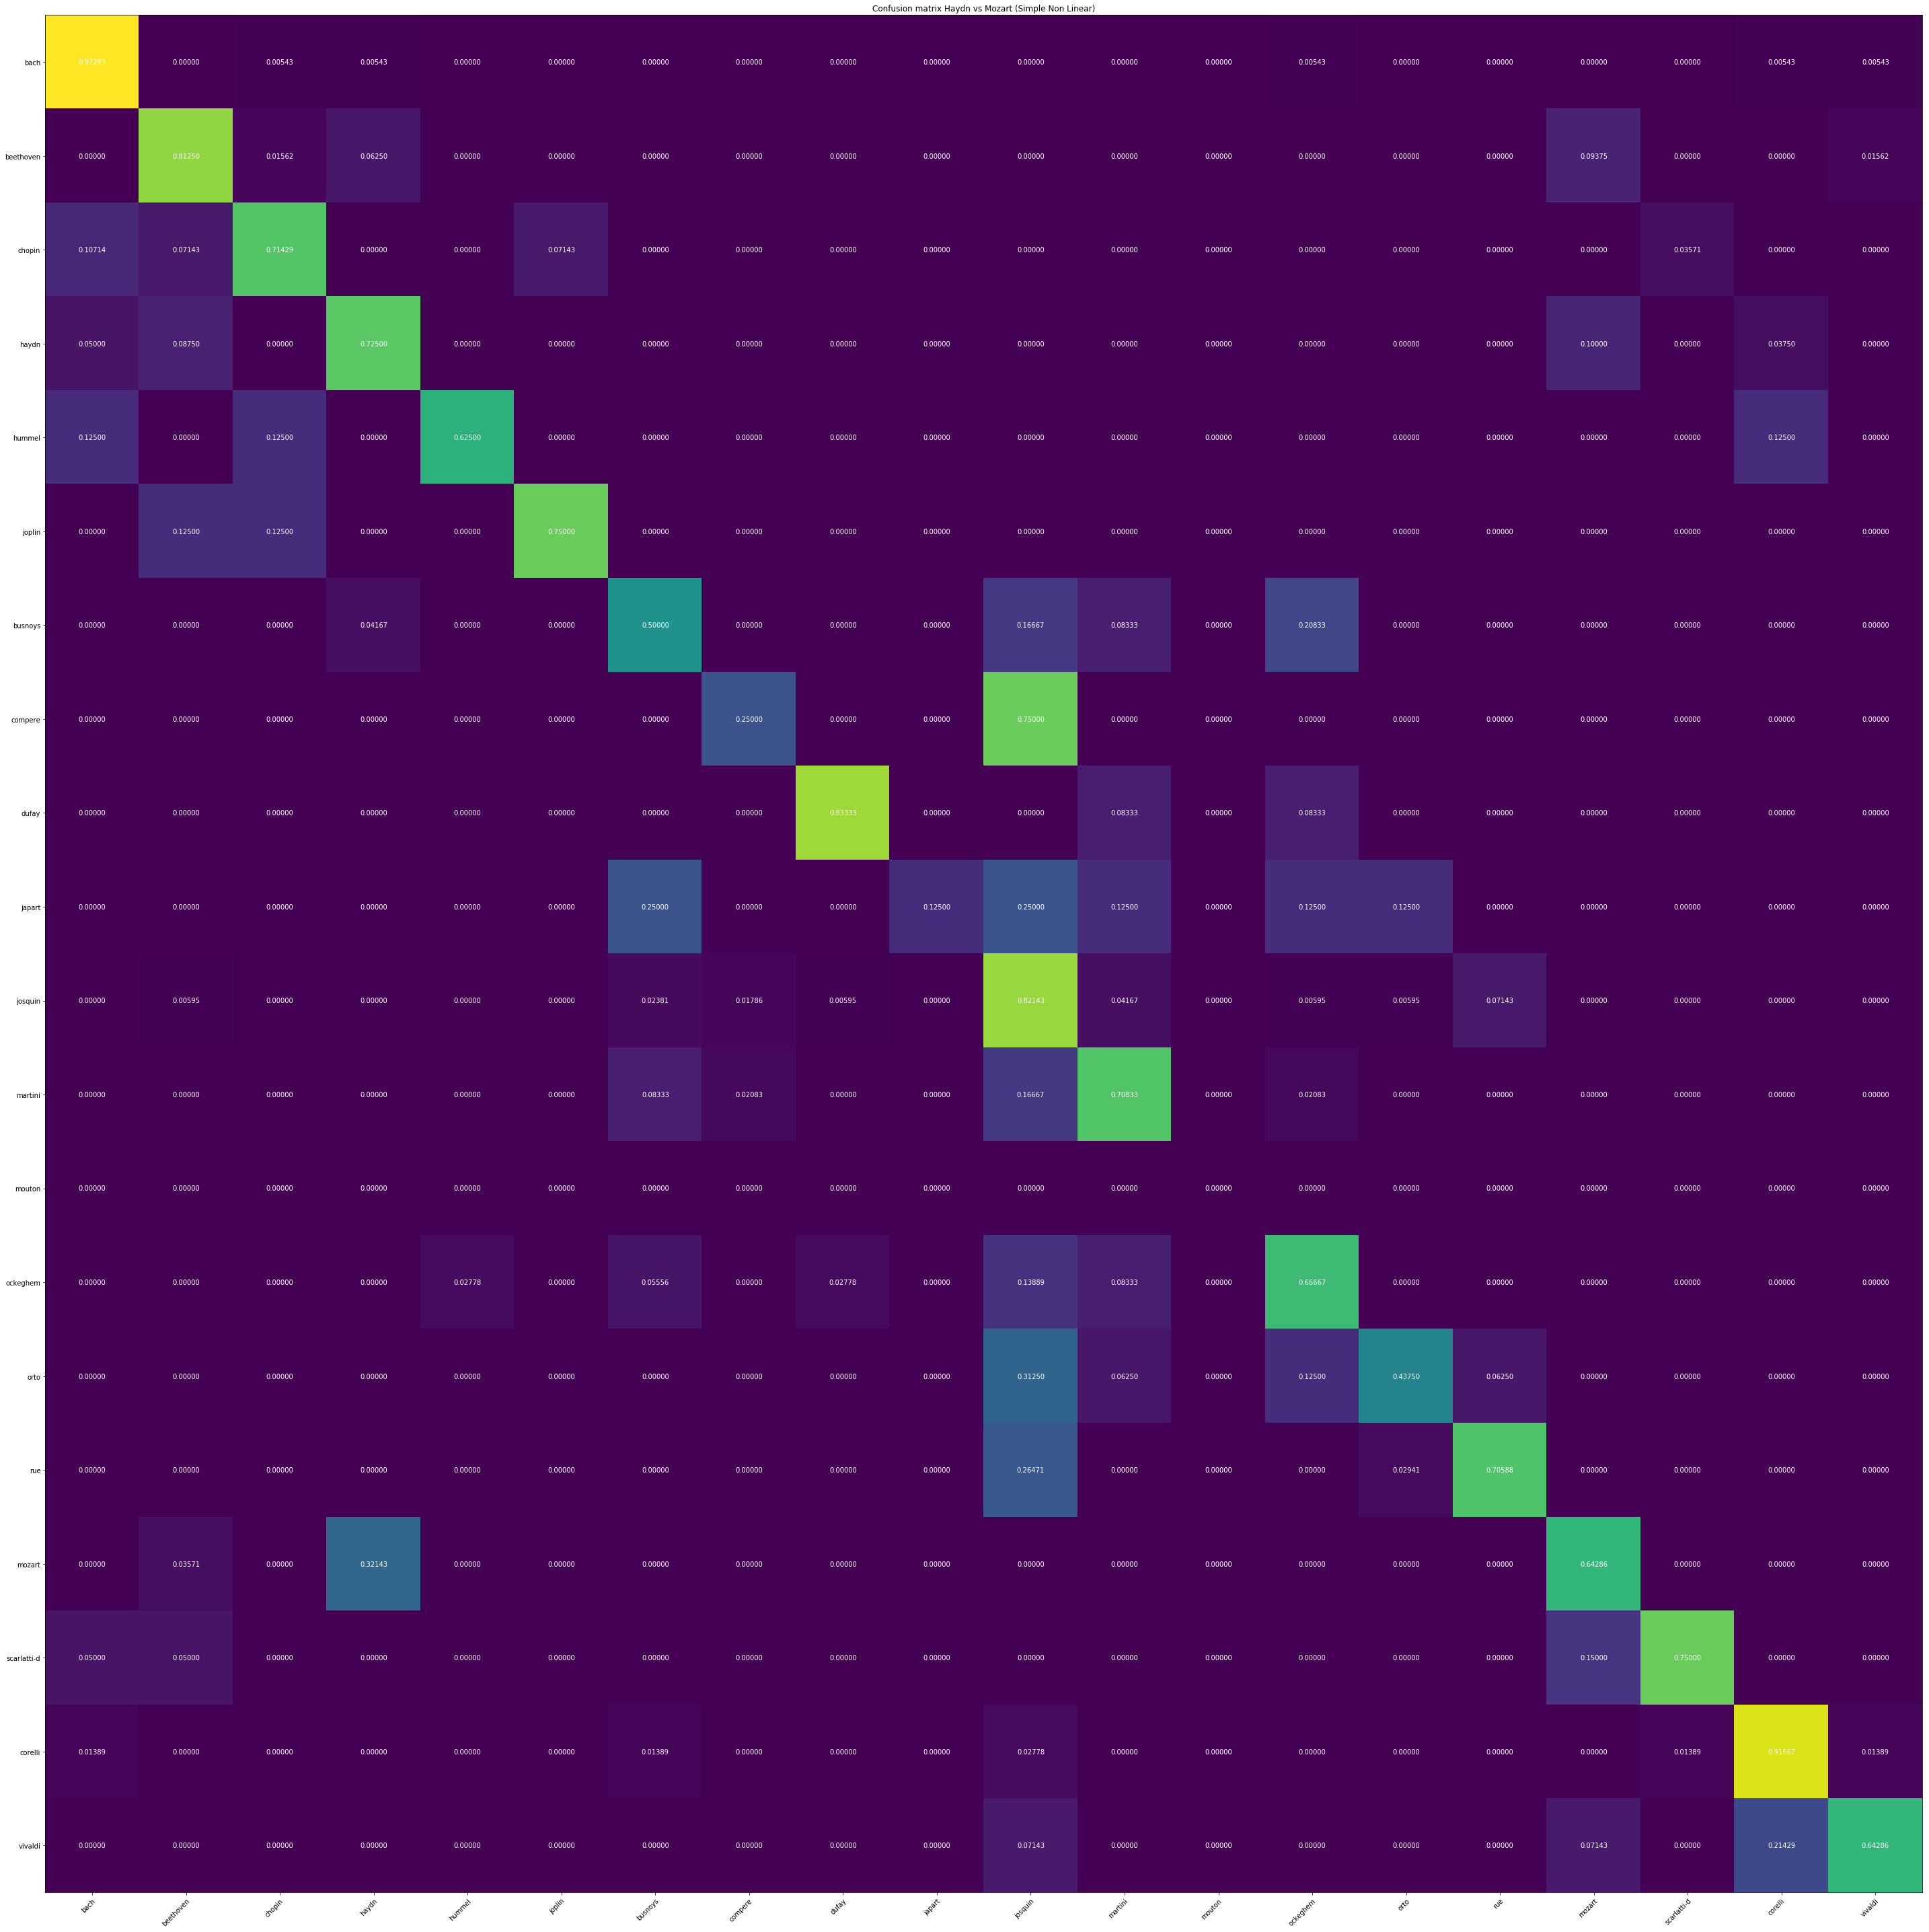

bach 44 / 46 = 0.9565217391304348
beethoven 11 / 16 = 0.6875
busnoys 2 / 6 = 0.3333333333333333
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 2 / 3 = 0.6666666666666666
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 35 / 42 = 0.8333333333333334
martini 9 / 12 = 0.75
mozart 8 / 14 = 0.5714285714285714
ockeghem 7 / 9 = 0.7777777777777778
orto 1 / 4 = 0.25
rue 13 / 17 = 0.7647058823529411
scarlatti-d 3 / 5 = 0.6
vivaldi 2 / 5 = 0.4
178 234 0.7606837606837606
---------------------------------------------
---------------------------------------------
Fold 4
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([2

100.00  78.11   7688    0.01    3.58    29.07   8.03    
99.50   77.68   7750    0.01    3.61    31.65   7.64    
99.50   77.68   7812    0.01    3.63    35.53   9.06    
99.50   78.11   7874    0.01    3.67    32.40   8.90    
99.50   77.68   7936    0.01    3.73    32.46   8.80    
99.50   77.68   7998    0.01    3.75    32.84   9.23    
99.50   77.68   8060    0.01    3.76    34.18   9.39    
99.50   78.11   8122    0.01    3.77    34.53   9.63    
99.50   76.82   8184    0.01    3.78    31.03   9.64    
100.00  77.68   8246    0.01    3.80    32.71   8.83    
100.00  77.68   8308    0.01    3.83    30.88   8.37    
100.00  78.54   8370    0.01    3.82    34.67   9.58    
99.50   79.40   8432    0.01    3.86    32.03   8.76    
100.00  79.40   8494    0.01    4.00    32.18   9.57    
99.50   78.97   8556    0.01    4.03    33.07   9.20    
99.50   78.54   8618    0.02    4.02    32.94   9.60    
Finished
**************
Test accuracy :  0.7811158798283262


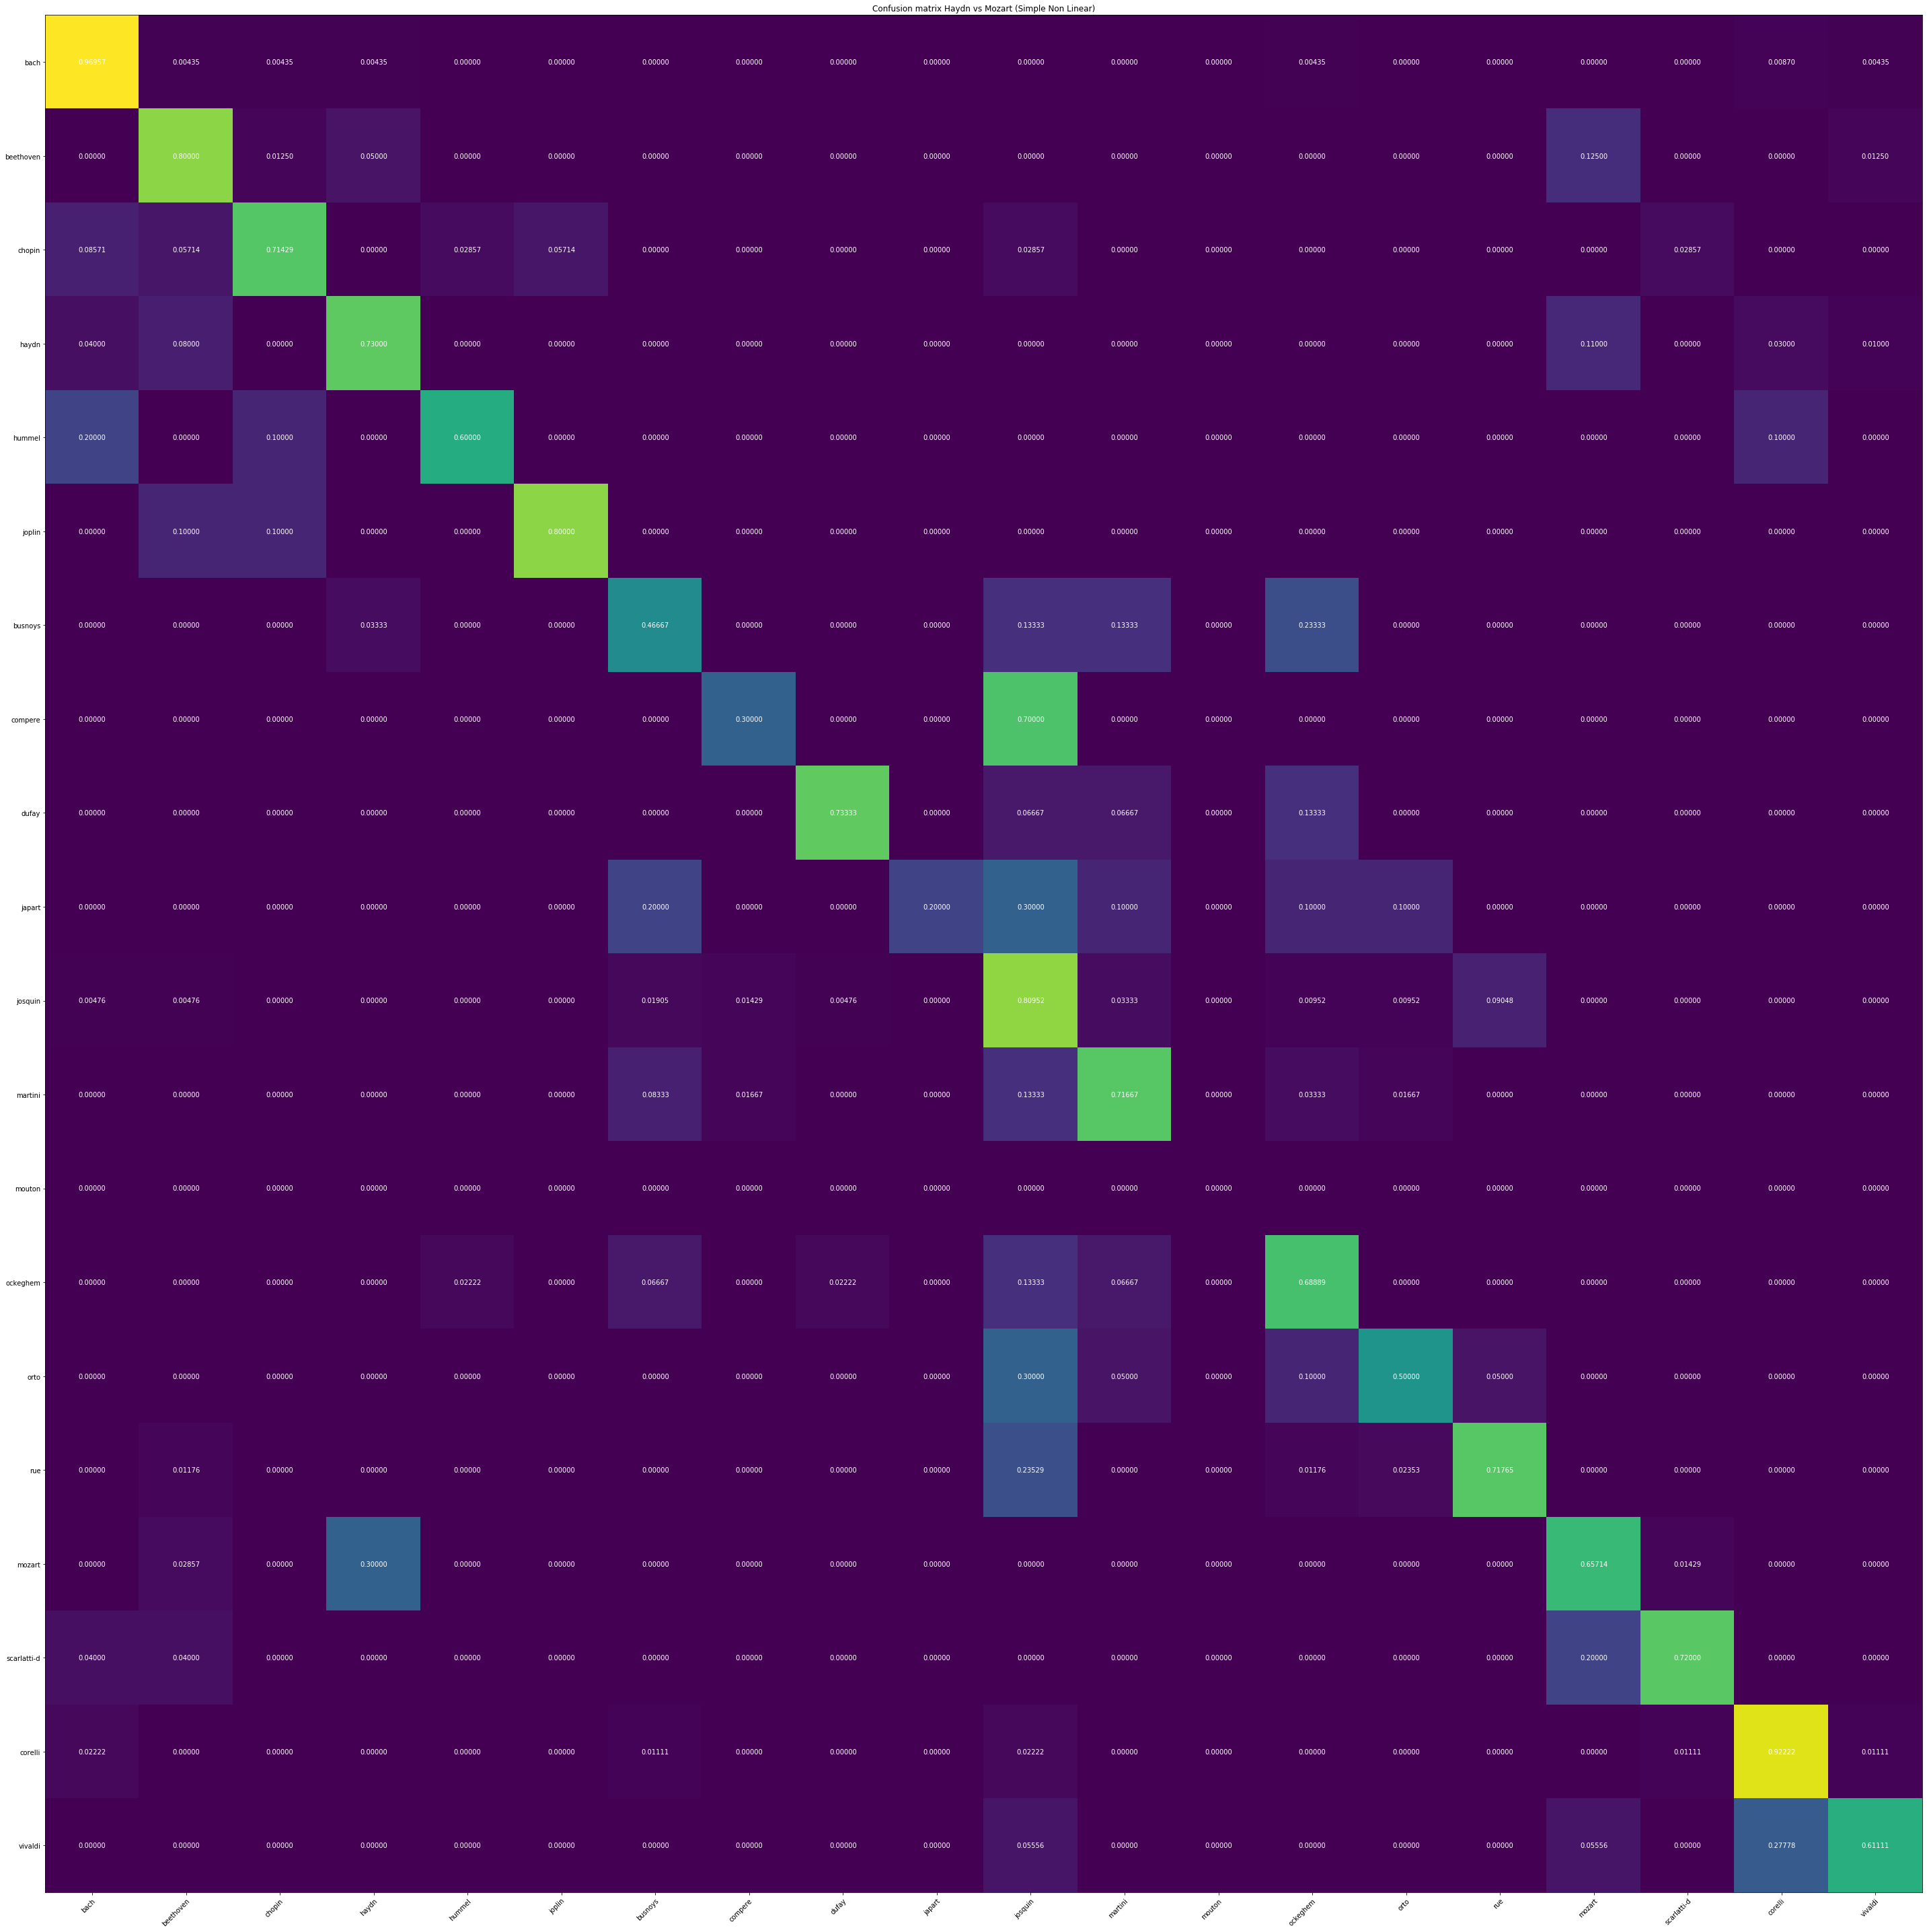

bach 44 / 46 = 0.9565217391304348
beethoven 12 / 16 = 0.75
busnoys 2 / 6 = 0.3333333333333333
chopin 5 / 7 = 0.7142857142857143
compere 1 / 2 = 0.5
corelli 17 / 18 = 0.9444444444444444
dufay 1 / 3 = 0.3333333333333333
haydn 15 / 20 = 0.75
hummel 1 / 2 = 0.5
japart 1 / 2 = 0.5
joplin 4 / 4 = 1.0
josquin 32 / 42 = 0.7619047619047619
martini 9 / 12 = 0.75
mozart 10 / 14 = 0.7142857142857143
ockeghem 7 / 9 = 0.7777777777777778
orto 3 / 4 = 0.75
rue 13 / 17 = 0.7647058823529411
scarlatti-d 3 / 5 = 0.6
vivaldi 2 / 4 = 0.5
182 233 0.7811158798283262
---------------------------------------------
---------------------------------------------
Fold 5
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([25

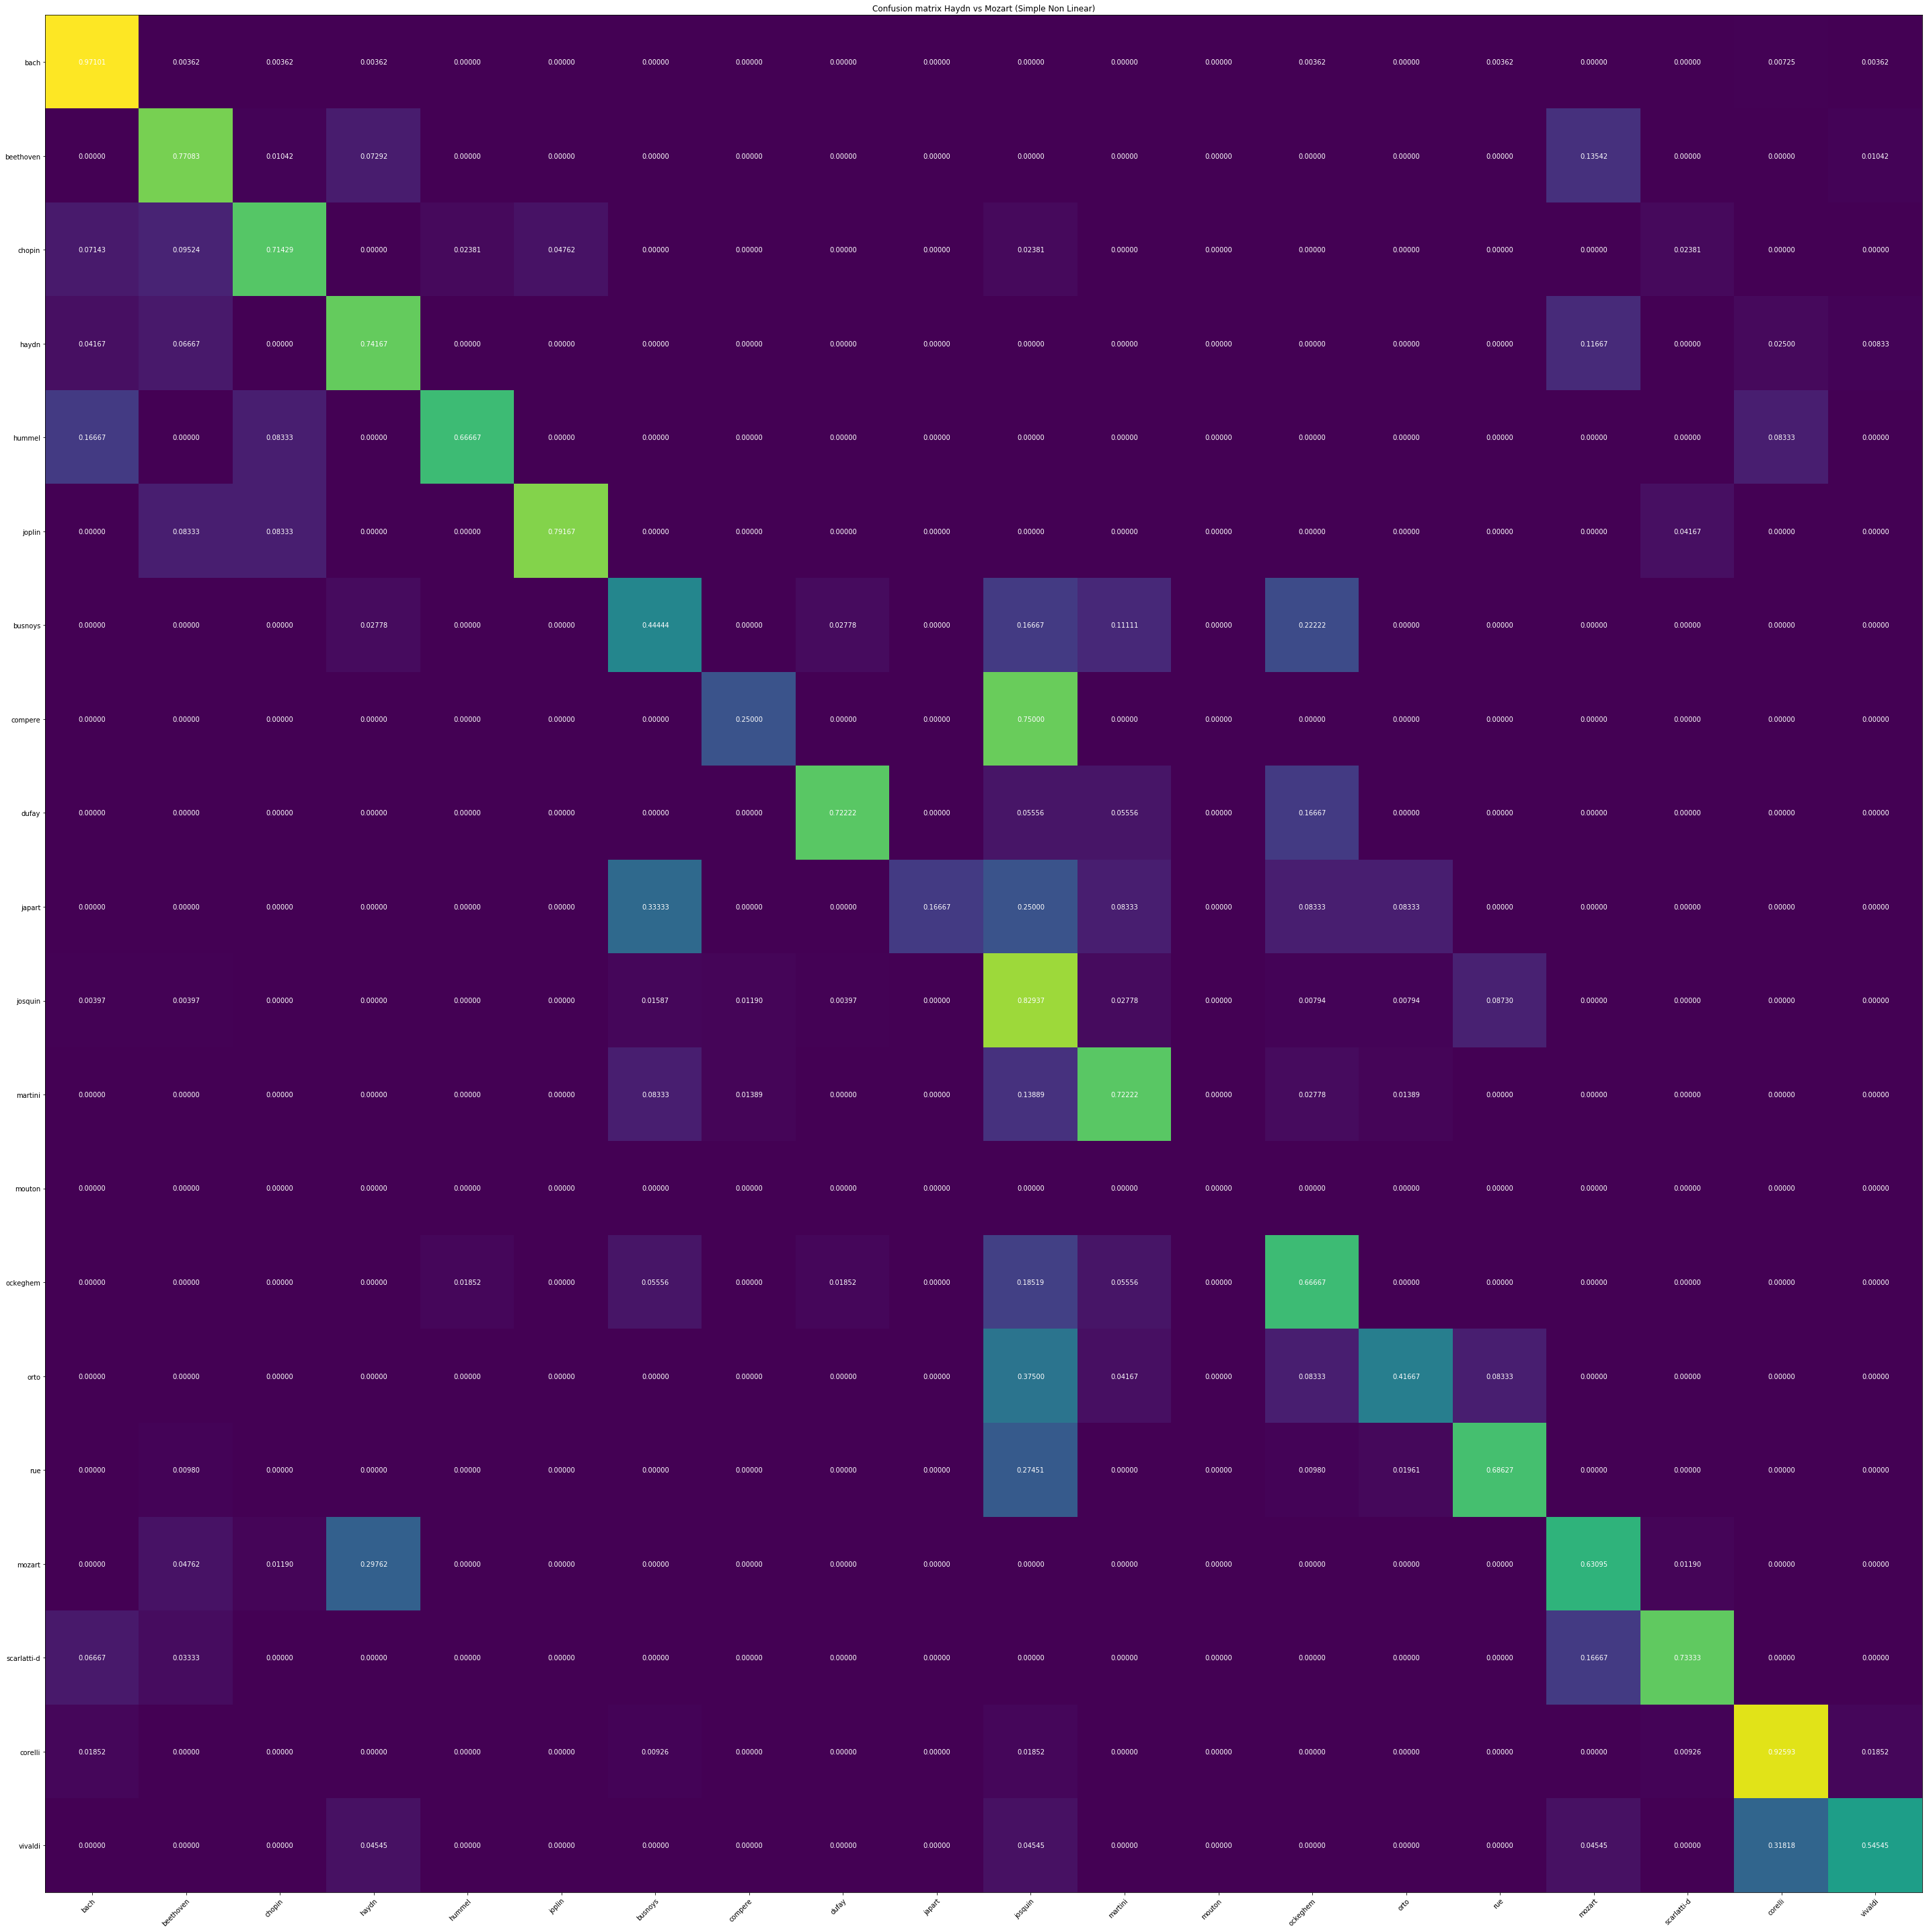

bach 45 / 46 = 0.9782608695652174
beethoven 10 / 16 = 0.625
busnoys 2 / 6 = 0.3333333333333333
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 2 / 3 = 0.6666666666666666
haydn 16 / 20 = 0.8
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 39 / 42 = 0.9285714285714286
martini 9 / 12 = 0.75
mozart 7 / 14 = 0.5
ockeghem 5 / 9 = 0.5555555555555556
orto 0 / 4 = 0.0
rue 9 / 17 = 0.5294117647058824
scarlatti-d 4 / 5 = 0.8
vivaldi 1 / 4 = 0.25
176 233 0.7553648068669528
---------------------------------------------
---------------------------------------------
Fold 6
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256, 20]) (5120)
b

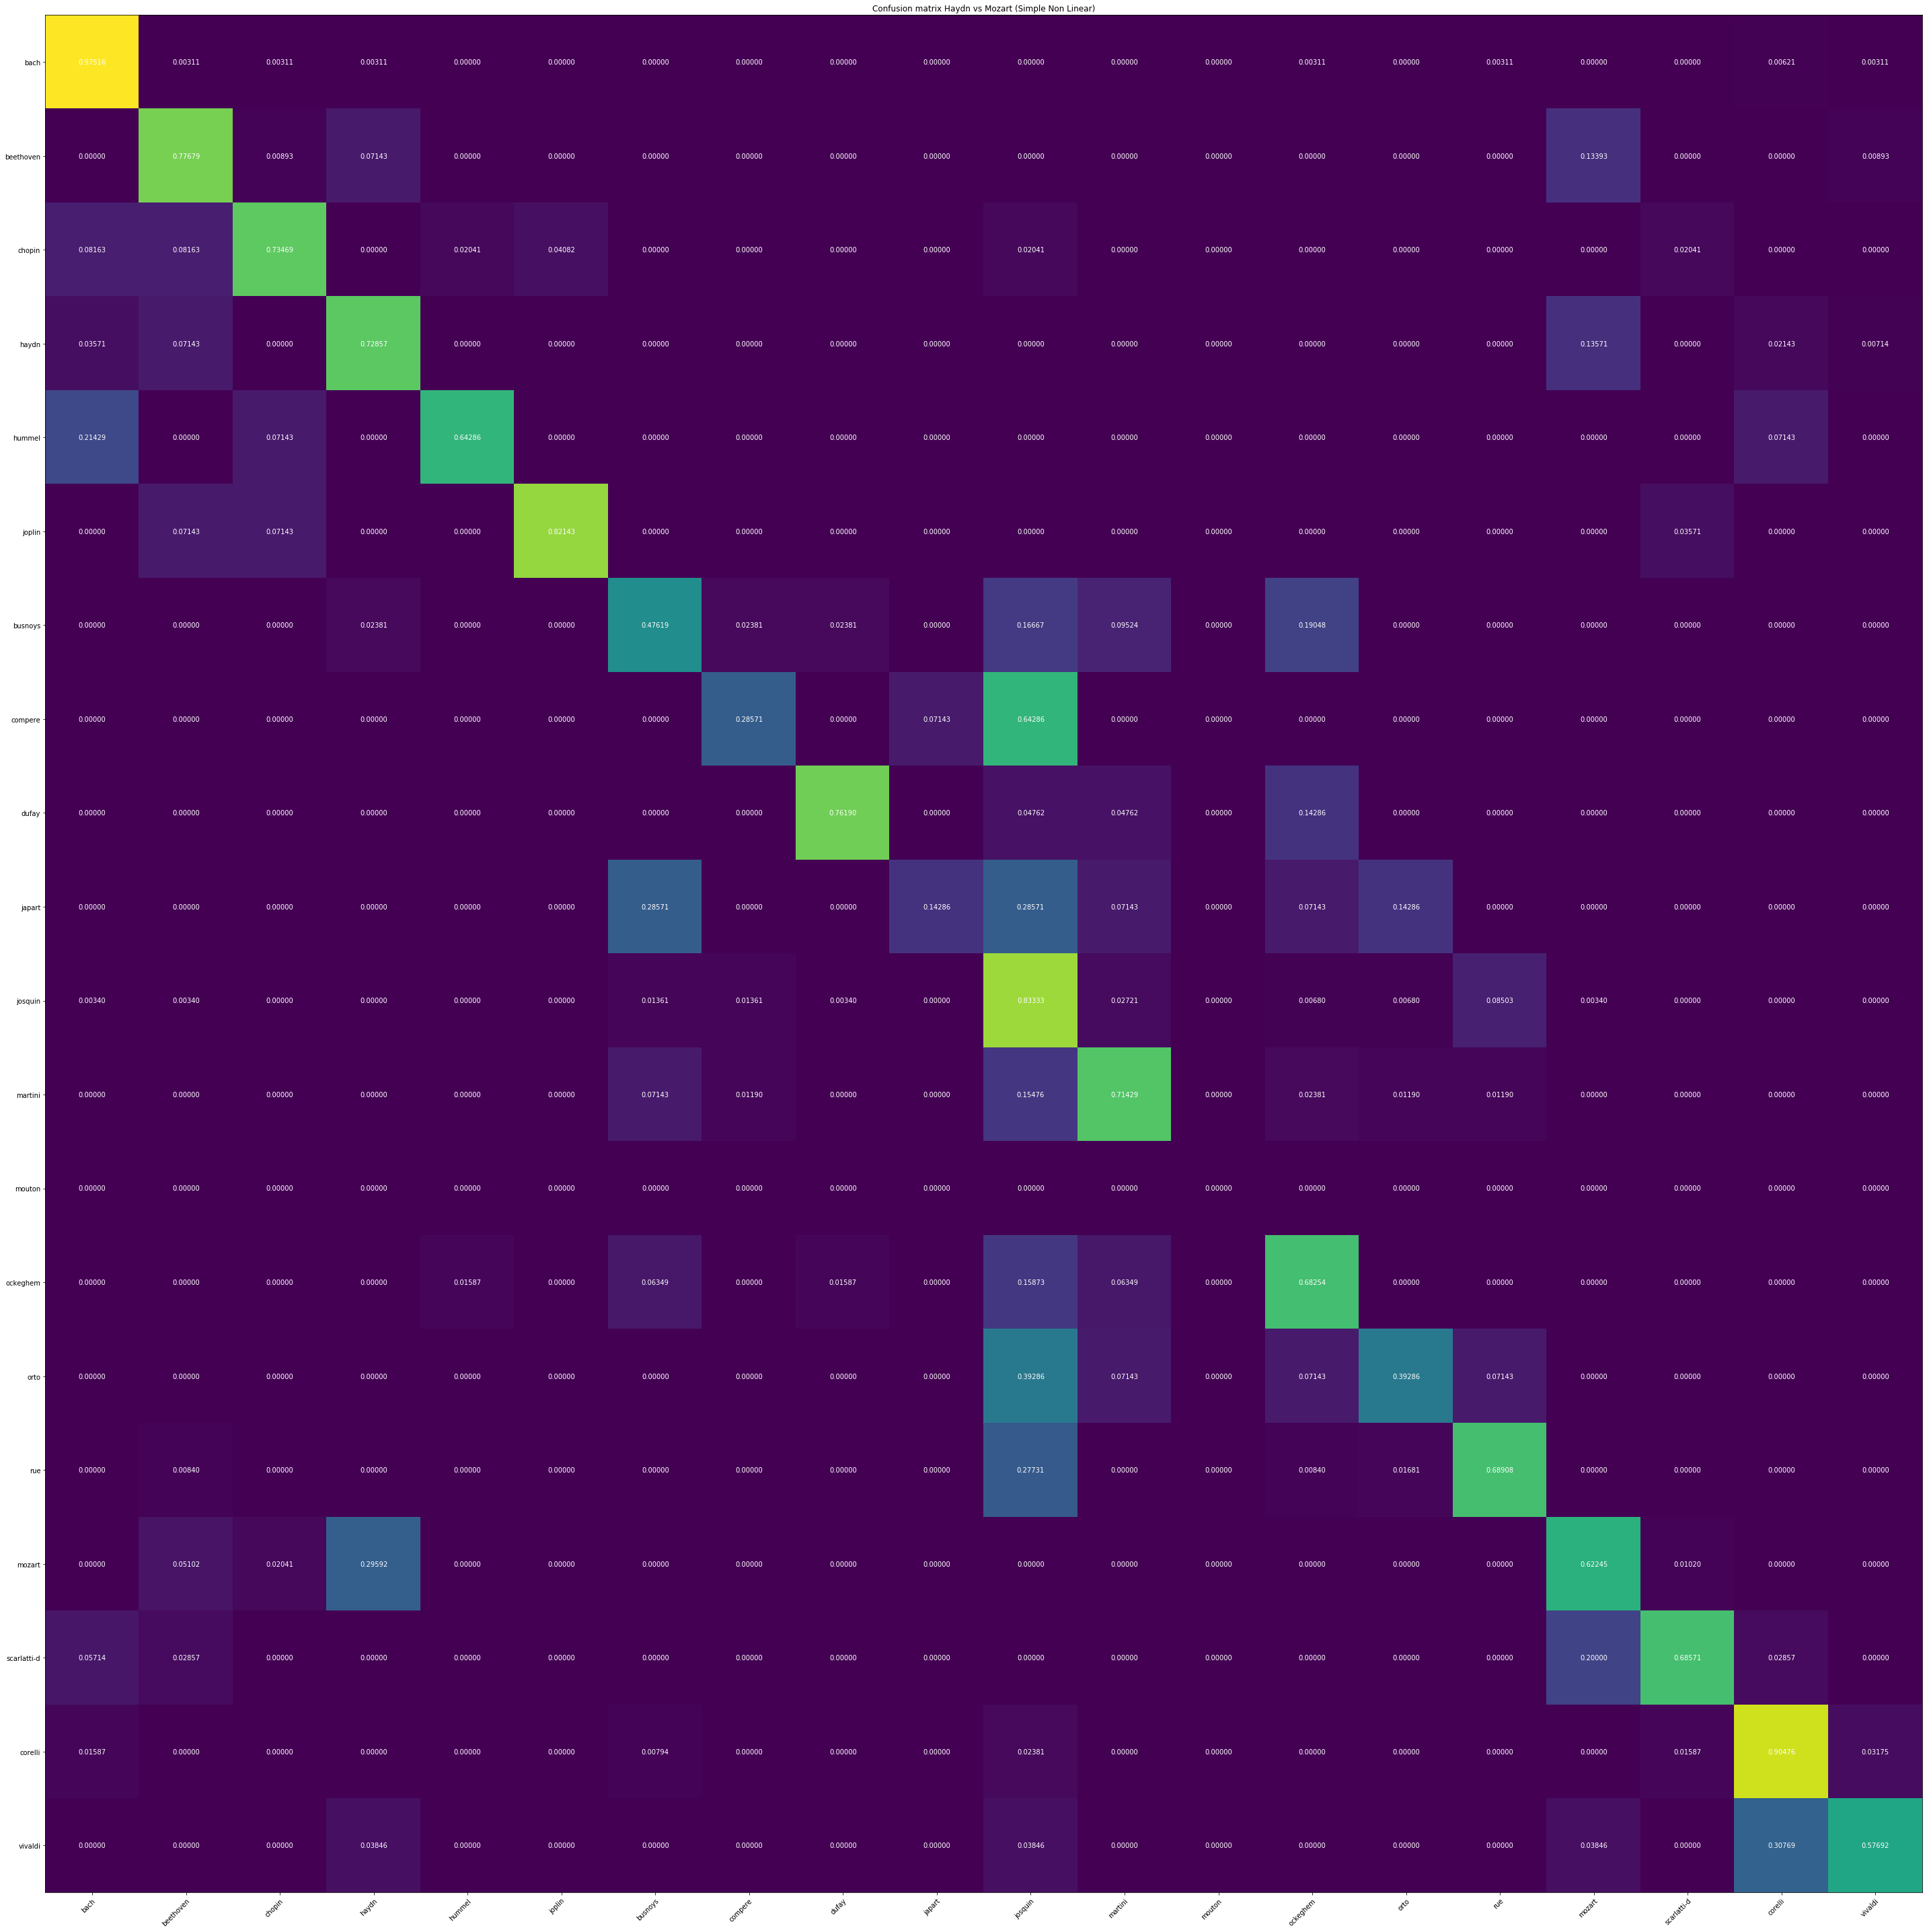

bach 46 / 46 = 1.0
beethoven 13 / 16 = 0.8125
busnoys 4 / 6 = 0.6666666666666666
chopin 6 / 7 = 0.8571428571428571
compere 1 / 2 = 0.5
corelli 14 / 18 = 0.7777777777777778
dufay 3 / 3 = 1.0
haydn 13 / 20 = 0.65
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 36 / 42 = 0.8571428571428571
martini 8 / 12 = 0.6666666666666666
mozart 8 / 14 = 0.5714285714285714
ockeghem 7 / 9 = 0.7777777777777778
orto 1 / 4 = 0.25
rue 12 / 17 = 0.7058823529411765
scarlatti-d 2 / 5 = 0.4
vivaldi 3 / 4 = 0.75
182 233 0.7811158798283262
---------------------------------------------
---------------------------------------------
Fold 7
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256, 20]) (5120)

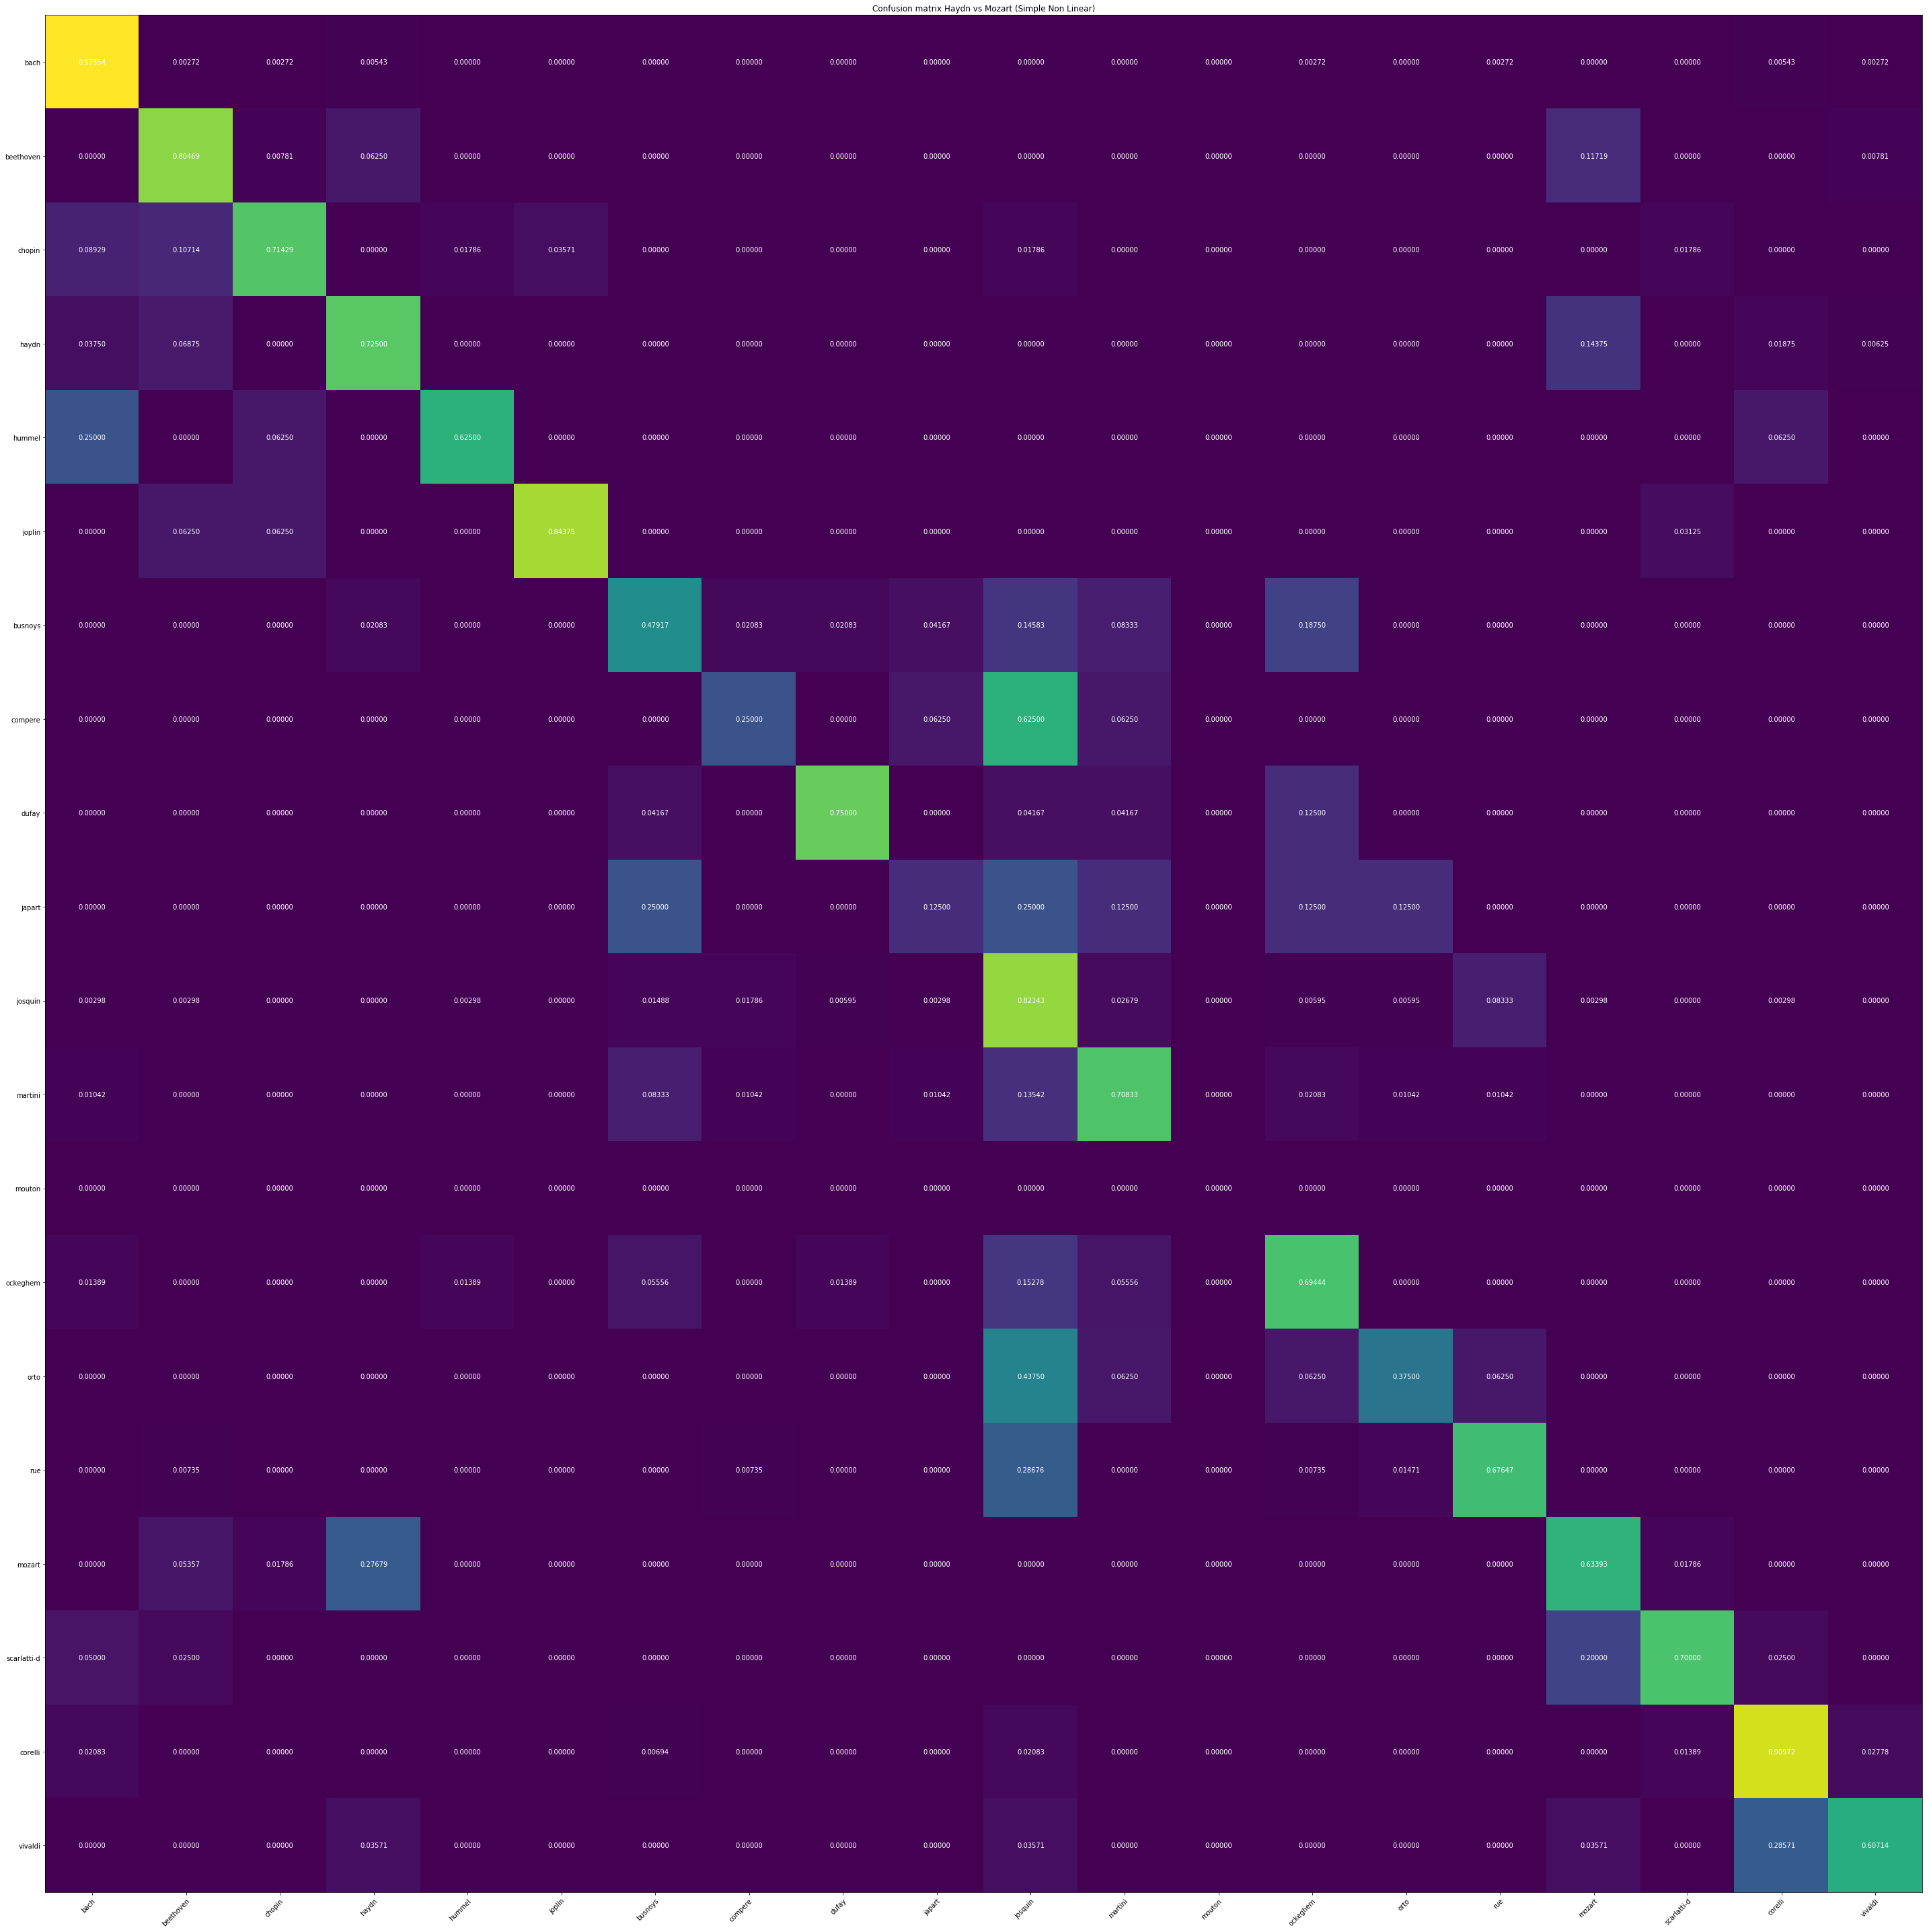

bach 45 / 46 = 0.9782608695652174
beethoven 16 / 16 = 1.0
busnoys 3 / 6 = 0.5
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 2 / 3 = 0.6666666666666666
haydn 14 / 20 = 0.7
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 31 / 42 = 0.7380952380952381
martini 8 / 12 = 0.6666666666666666
mozart 10 / 14 = 0.7142857142857143
ockeghem 7 / 9 = 0.7777777777777778
orto 1 / 4 = 0.25
rue 10 / 17 = 0.5882352941176471
scarlatti-d 4 / 5 = 0.8
vivaldi 2 / 2 = 1.0
179 231 0.7748917748917749
---------------------------------------------
---------------------------------------------
Fold 8
len validation_ids 400
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256, 

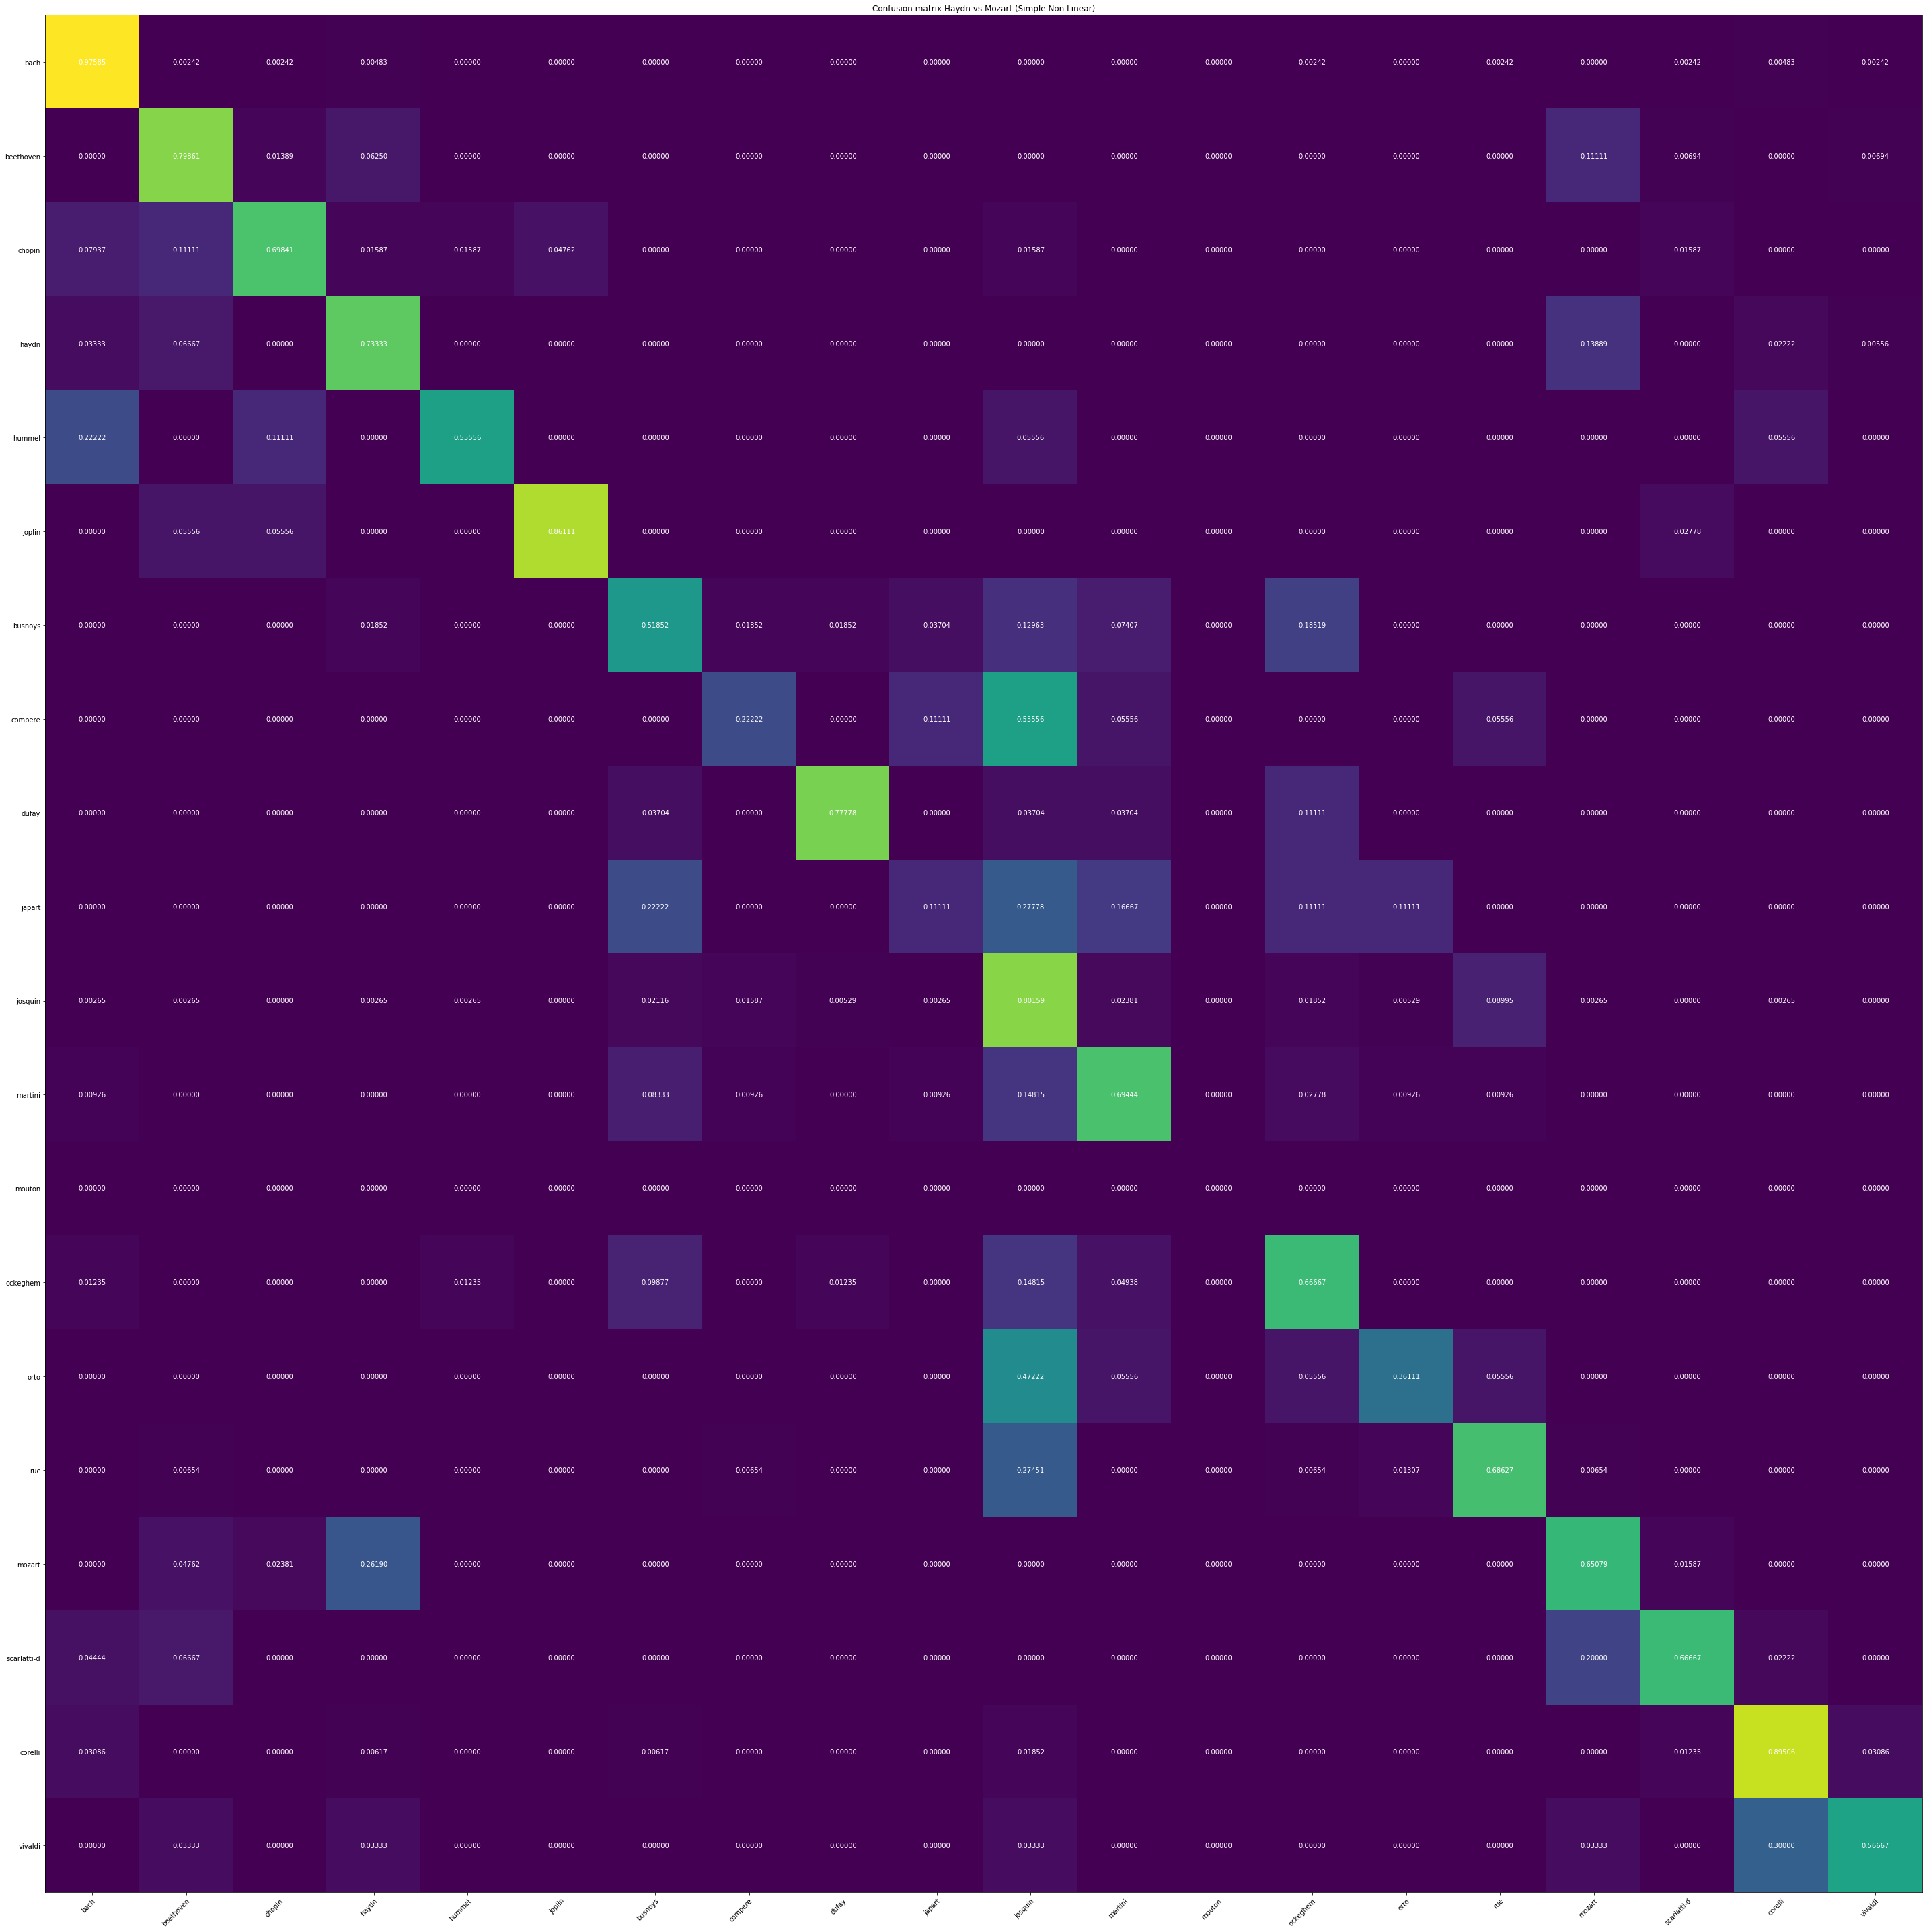

bach 45 / 46 = 0.9782608695652174
beethoven 12 / 16 = 0.75
busnoys 5 / 6 = 0.8333333333333334
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 14 / 18 = 0.7777777777777778
dufay 3 / 3 = 1.0
haydn 16 / 20 = 0.8
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 27 / 42 = 0.6428571428571429
martini 7 / 12 = 0.5833333333333334
mozart 11 / 14 = 0.7857142857142857
ockeghem 4 / 9 = 0.4444444444444444
orto 1 / 4 = 0.25
rue 13 / 17 = 0.7647058823529411
scarlatti-d 2 / 5 = 0.4
vivaldi 0 / 2 = 0.0
168 231 0.7272727272727273
---------------------------------------------
---------------------------------------------
Fold 9
len validation_ids 246
len test_ids 400
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
wnotesm torch.Size([256, 78, 1, 3]) (59904)
wdurationm torch.Size([256, 55, 1, 3]) (42240)
w2m torch.Size([256, 256, 1, 3]) (196608)
wtopm torch.Size([256,

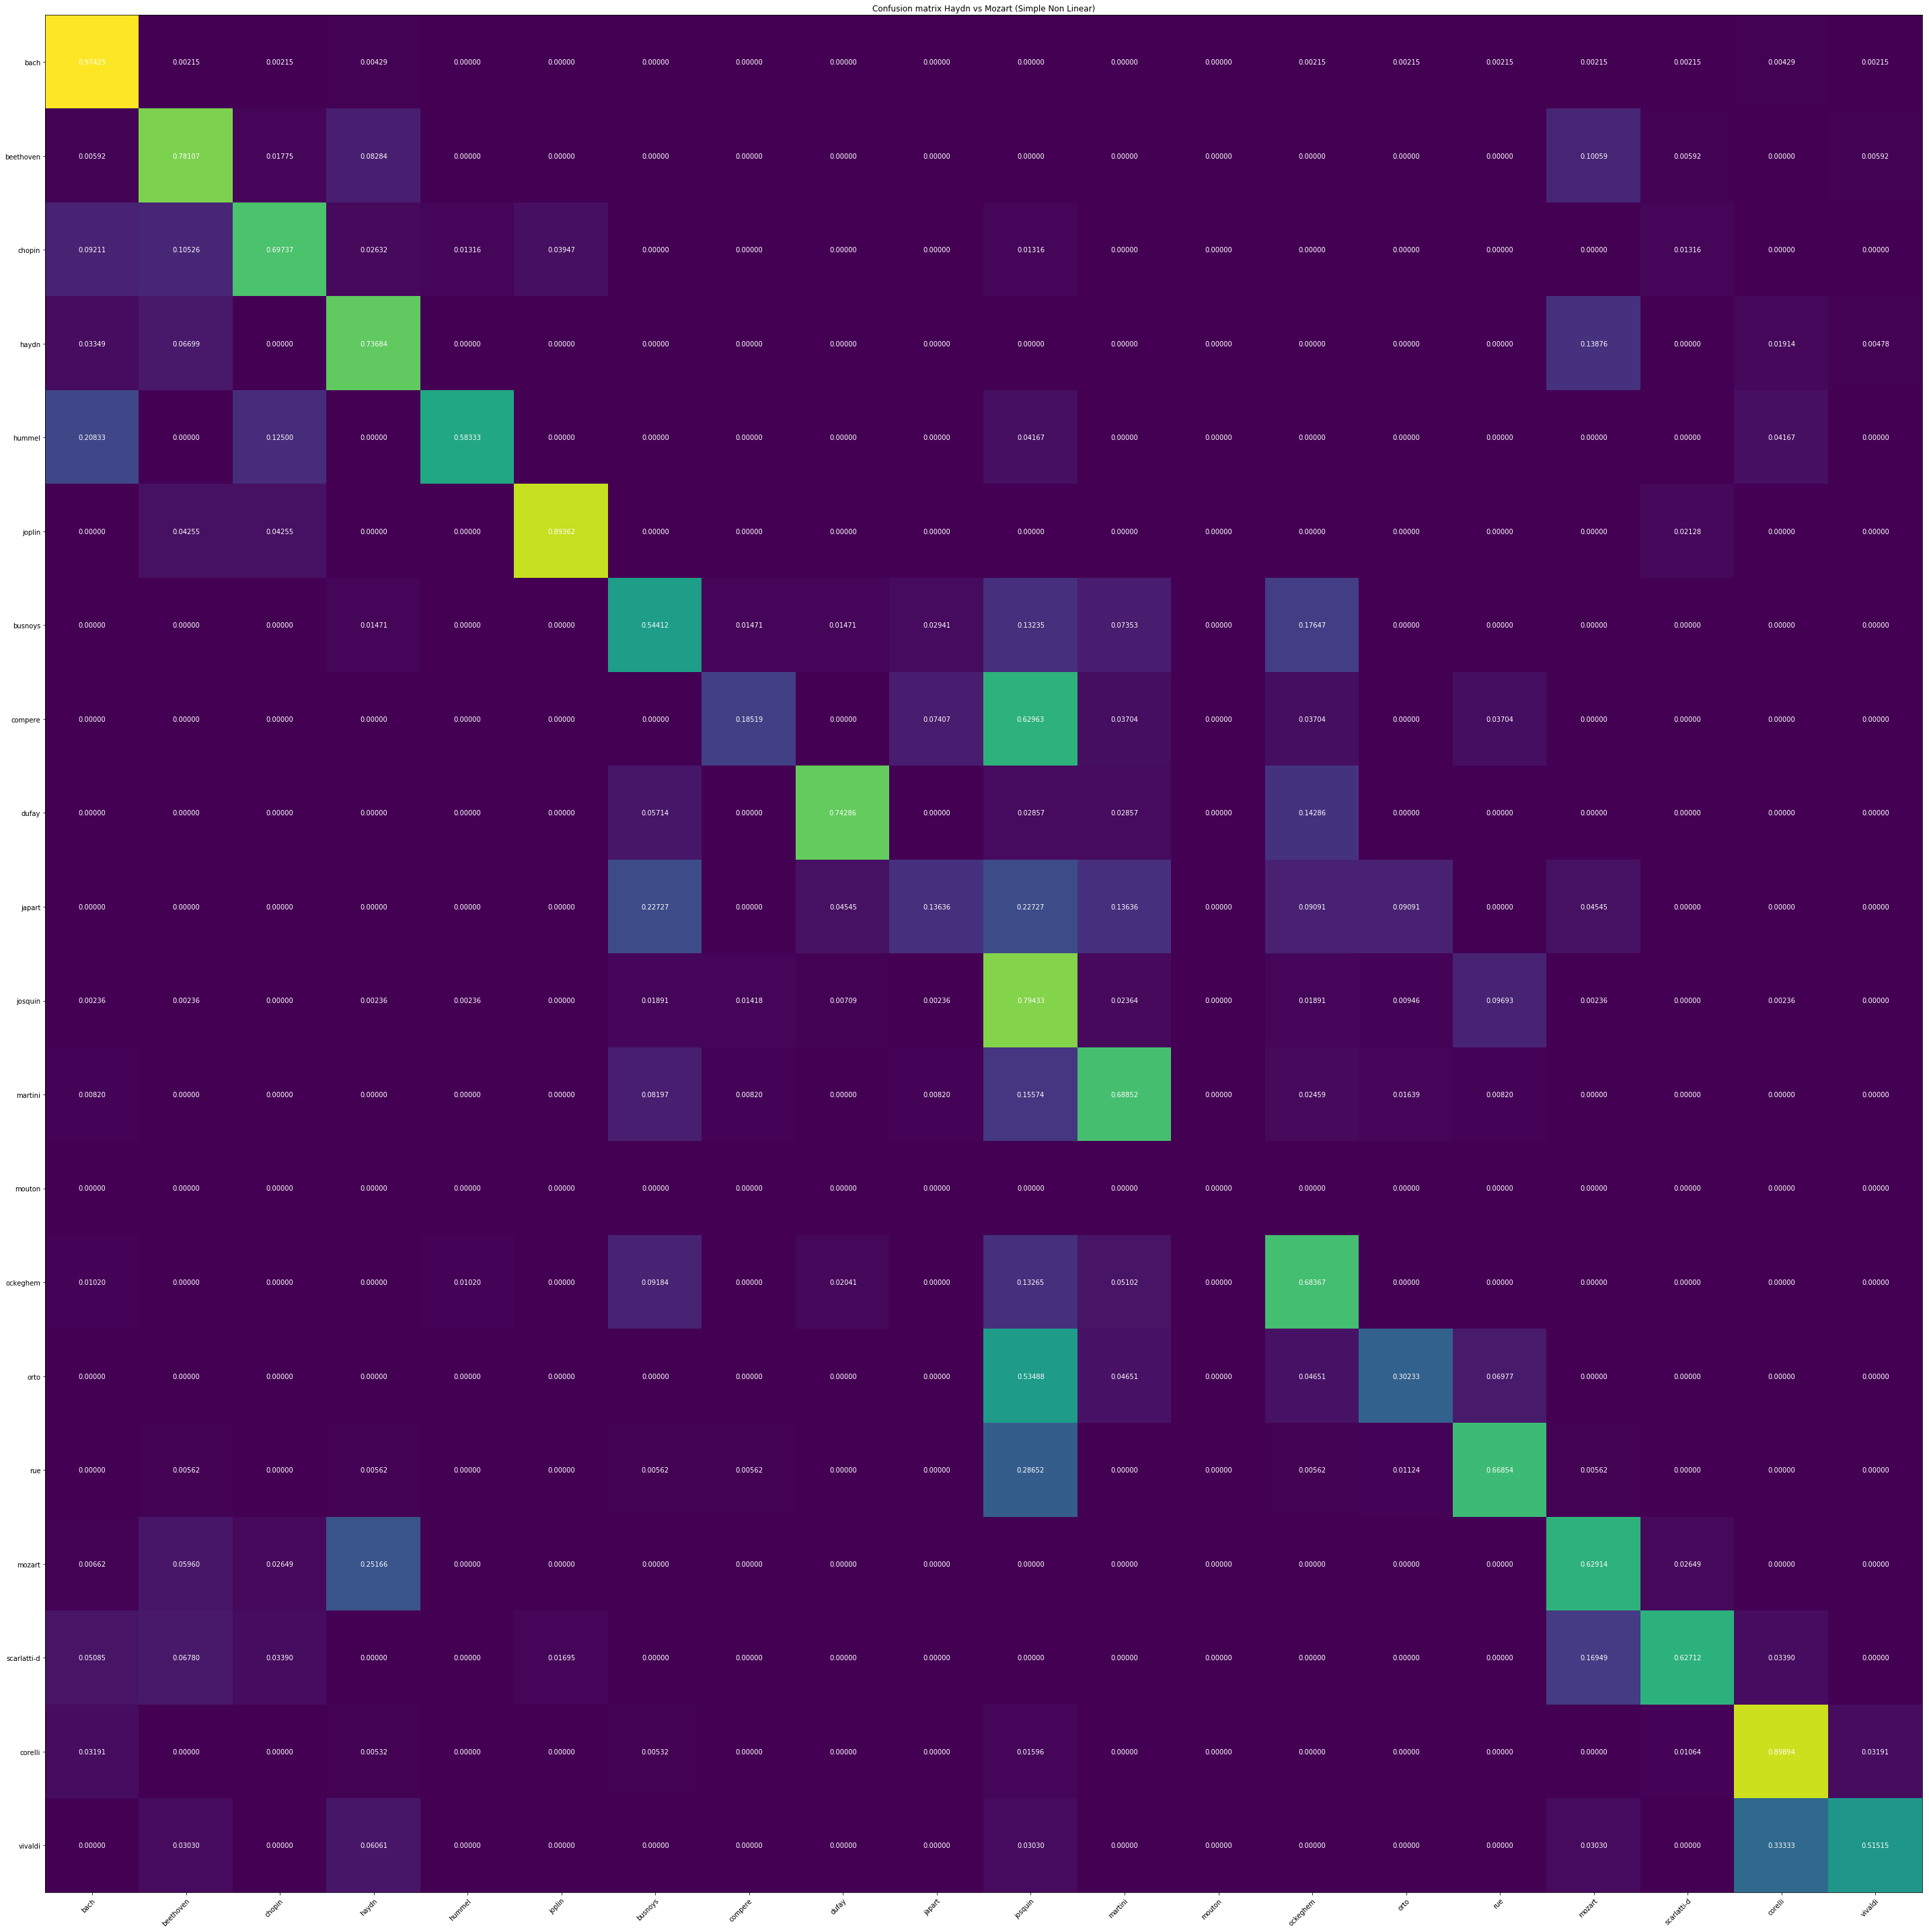

bach 50 / 52 = 0.9615384615384616
beethoven 17 / 25 = 0.68
busnoys 9 / 14 = 0.6428571428571429
chopin 9 / 13 = 0.6923076923076923
compere 1 / 9 = 0.1111111111111111
corelli 24 / 26 = 0.9230769230769231
dufay 5 / 8 = 0.625
haydn 22 / 29 = 0.7586206896551724
hummel 4 / 6 = 0.6666666666666666
japart 1 / 4 = 0.25
joplin 11 / 11 = 1.0
josquin 33 / 45 = 0.7333333333333333
martini 9 / 14 = 0.6428571428571429
mozart 13 / 25 = 0.52
ockeghem 13 / 17 = 0.7647058823529411
orto 0 / 7 = 0.0
rue 14 / 25 = 0.56
scarlatti-d 7 / 14 = 0.5
vivaldi 0 / 3 = 0.0
242 347 0.6974063400576369


In [4]:
validator = CrossValidator(Convnet, corpora, is_patches_model=True, patience=30, batch_size=32)
validator.run(context, checkpoint_dir=checkpoint_dir)

In [1]:
(242+168+179+182+176+182+178+175+185+190)/2438.

0.7616899097621